Neural net for predicting fraudulent transactions using [Kaggle Fraudulent Transactions Data](https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download).

Importing necessary librarys.

Historic versions

In [260]:
hyperparameters = pd.DataFrame([[1,"Initial","binary_crossentropy",0.01,"RMSprop",20,256,0.2,(1,1),0.001,0.5,None,2,13],
                               [2,"Weight class","binary_crossentropy",0.001,"RMSprop",100,256,0.2,(1,77.1046),0.001,0.5,None,2,13],
                               [3,"Undersampling","binary_crossentropy",0.0003,"RMSprop",200,256,0.2,(1,1),0.1,0.5,None,2,13],
                               [4,"Deeper NN","binary_crossentropy",0.0003,"RMSprop",200,256,0.2,(1,3.7951),0.05,0.5,'ReLU',4,241],
                               [5,"Adam Opt","binary_crossentropy",0.0001,"Adam",400,256,0.2,(1,3.7951),0.05,0.85,'ReLU',4,241],
                               [6,"Longer run","binary_crossentropy",0.00005,"Adam",4000,256,0.2,(1,3.7951),0.05,0.75,'ReLU',4,241]],
                                columns=['iter','comment','loss','learning_rate','optimizer','epochs','batch_size', 'validation_split','class_weights','bias_aftre_us','tp_threshold','act_fun',"#layers","#params"])

metrics = pd.DataFrame([[0.004541558679193258,0.02667786367237568,0.41296297311782837,0.9151846766471863,0.6184723377227783],
                       [0.021265724673867226,0.055535029619932175,0.6895061731338501,0.3480835258960724,0.6146407127380371],
                       [0.033423855900764465,0.07861153781414032,0.7685185074806213,0.1780606359243393,0.5602833032608032],
                       [0.02457200549542904,0.08548039197921753,0.959876537322998,0.11682945489883423,0.8254401683807373],
                       [0.011895498260855675,0.05829277262091637,0.932716049382716,0.5773786778754298,0.9013235569000244],
                       [0.00917352270334959,0.04084905982017517,0.991358024691358,0.47983268598745143,0.9297931790351868]],
                        columns=['loss','root_mean_squared_error','recall','precision','AUC_pr'])


In [259]:
test_score

[0.00917352270334959,
 0.04084905982017517,
 0.9950617551803589,
 0.345700204372406,
 0.9297931790351868]

In [261]:
pd.concat([hyperparameters,metrics],axis=1)

,iter,comment,loss,learning_rate,optimizer,epochs,batch_size,validation_split,class_weights,bias_aftre_us,tp_threshold,act_fun,#layers,#params,loss,root_mean_squared_error,recall,precision,AUC_pr
0,1,Initial,binary_crossentropy,0.01000,RMSprop,20,256,0.2,"(1, 1)",0.001,0.50,None,2,13,0.004542,0.026678,0.412963,0.915185,0.618472
1,2,Weight class,binary_crossentropy,0.00100,RMSprop,100,256,0.2,"(1, 77.1046)",0.001,0.50,None,2,13,0.021266,0.055535,0.689506,0.348084,0.614641
2,3,Undersampling,binary_crossentropy,0.00030,RMSprop,200,256,0.2,"(1, 1)",0.100,0.50,None,2,13,0.033424,0.078612,0.768519,0.178061,0.560283
3,4,Deeper NN,binary_crossentropy,0.00030,RMSprop,200,256,0.2,"(1, 3.7951)",0.050,0.50,ReLU,4,241,0.024572,0.085480,0.959877,0.116829,0.825440
4,5,Adam Opt,binary_crossentropy,0.00010,Adam,400,256,0.2,"(1, 3.7951)",0.050,0.85,ReLU,4,241,0.011895,0.058293,0.932716,0.577379,0.901324
5,6,Longer run,binary_crossentropy,0.00005,Adam,4000,256,0.2,"(1, 3.7951)",0.050,0.75,ReLU,4,241,0.009174,0.040849,0.991358,0.479833,0.929793


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve
import tensorflow as tf
import scipy as sp
import seaborn as sns

Downloading data

In [105]:
df=pd.read_csv('C:/Users/T440s/Kaggle/archive/fraudulent_transaction_data.csv')

Getting to know the data set.

In [106]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [107]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [108]:
'Number of cases where transaction originator is not Customer: {}'.format(len(df[df["nameOrig"].str.get(0) != "C"]))

'Number of cases where transaction originator is not Customer: 0'

Dataset doesn't have any missing data fields. Balance is missing for Merchant type persons. Merchants only on the Dest side.

Let's use this plot from the internet to illustrate how a model is performing.

In [175]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  
  print('Precision: ', cm[1][1]/(cm[1][1]+cm[0][1]))
  print('Recall: ', cm[1][1]/(cm[1][1]+cm[1][0]))
  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  #plt.xlim([-0.5,20])
  #plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

def plot_pr(name, labels, predictions, threshold=0.5, **kwargs):
  prec, rec, _ = precision_recall_curve(labels, predictions)

  cm = confusion_matrix(labels, predictions > threshold)

  plt.plot(100*prec, 100*rec, label=name, linewidth=2, **kwargs)
  plt.plot(100*cm[1][1]/(cm[1][1]+cm[0][1]),100*cm[1][1]/(cm[1][1]+cm[1][0]),"ro")
  plt.xlabel('Precision')
  plt.ylabel('Recall')
  #plt.xlim([-0.5,20])
  #plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

### Feature engineering

Next up, we'll be adding additional parameters to our model, but for that we have to change them a little bit.

##### `step`
We will leave this out for now, as it seems to be a strong but not most realistic predictor (most of the fraud takes place in low steps.

##### `type`
This categorical value needs to be formated to use in the model. We'll use one hot encoding.

##### `amount`
As we now have other attributes in the model, `amount` should be normalised.

##### `nameOrig`
We'll discard this for now.

##### `oldbalanceOrg`
Will rename it to  `oldbalanceOrig` and normalize.

##### `newbalanceOrig`
Have to normalize this.

##### `nameDest`
We'll discard this for now, but calculate new features `customerDest` (1 if C) and `merchantDest` (1 if M).

##### `oldbalanceDest`
Have to normalize this. As the balance is 0 for all merchants, as it is unknown, other substitutes should be considered.

##### `newbalanceDest`
Have to normalize this. As the balance is 0 for all merchants, as it is unknown, other substitutes should be considered.


Will use `isFraud` as the label.

In [110]:
X = df[["type","amount","oldbalanceOrg","newbalanceOrig","nameDest","oldbalanceDest","newbalanceDest"]]
X = X.rename(columns={"oldbalanceOrg": "oldbalanceOrig"})
X["customerDest"] = (X["nameDest"].str.get(0) == "C").astype(float)
X["merchantDest"] = (X["nameDest"].str.get(0) == "M").astype(float)
X = X.drop(columns=["nameDest"])
y = df[["isFraud"]]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Defining a preprocessing layer so that it will be easier to modify and apply in testing.

In [112]:
columns = np.array(X_train.columns)
features_to_scale = ["amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest"]

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features_to_scale),
        ('OHE', OneHotEncoder(sparse_output=False), ["type"]),
        ('passthrough', 'passthrough', ["customerDest", "merchantDest"])
    ],
    remainder='drop'  # Drop any columns not explicitly specified
).set_output(transform="pandas")

# Fit the ColumnTransformer and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)

In [113]:
print('X_train_transformed: {}'.format(X_train_transformed.shape))
X_train_transformed.head()

X_train_transformed: (5090096, 12)


,scaler__amount,scaler__oldbalanceOrig,scaler__newbalanceOrig,scaler__oldbalanceDest,scaler__newbalanceDest,OHE__type_CASH_IN,OHE__type_CASH_OUT,OHE__type_DEBIT,OHE__type_PAYMENT,OHE__type_TRANSFER,passthrough__customerDest,passthrough__merchantDest
6271196,0.343453,1.328802,1.437536,-0.174992,-0.301147,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1888243,0.054355,-0.207401,-0.139419,-0.086546,-0.171883,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5549957,-0.265601,-0.287416,-0.292395,-0.324181,-0.333782,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2025342,0.578206,-0.226251,-0.292395,-0.297011,-0.164739,0.0,1.0,0.0,0.0,0.0,1.0,0.0
682342,0.043732,-0.288675,-0.292395,0.304224,0.303786,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [114]:
X_train_transformed.describe()

,scaler__amount,scaler__oldbalanceOrig,scaler__newbalanceOrig,scaler__oldbalanceDest,scaler__newbalanceDest,OHE__type_CASH_IN,OHE__type_CASH_OUT,OHE__type_DEBIT,OHE__type_PAYMENT,OHE__type_TRANSFER,passthrough__customerDest,passthrough__merchantDest
count,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06
mean,1.171885e-17,3.435367e-16,-6.574246e-17,-7.196587e-16,1.418490e-16,2.198748e-01,3.517788e-01,6.520899e-03,3.380478e-01,8.377759e-02,6.619522e-01,3.380478e-01
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.141617e-01,4.775254e-01,8.048837e-02,4.730450e-01,2.770540e-01,4.730450e-01,4.730450e-01
min,-2.987904e-01,-2.886750e-01,-2.923954e-01,-3.241808e-01,-3.337815e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-2.765242e-01,-2.886750e-01,-2.923954e-01,-3.241808e-01,-3.337815e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,-1.743509e-01,-2.837629e-01,-2.923954e-01,-2.850611e-01,-2.752718e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,4.801567e-02,-2.515057e-01,-2.430638e-01,-4.653224e-02,-3.075325e-02,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,1.533627e+02,2.035079e+01,1.667349e+01,1.046361e+02,9.681375e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


As we can see, there are still some very large values in the data set, that need some further exploration.

Defining simple model using just one layer.

In [145]:
inputs = tf.keras.Input(shape=(X_train_transformed.shape[1],))

In [147]:
layer1 = tf.keras.layers.Dense(X_train_transformed.shape[1],activation = 'ReLU')(inputs)

In [148]:
layer2 = tf.keras.layers.Dense(round(X_train_transformed.shape[1]/2,0),activation = 'ReLU')(layer1)

In [149]:
outputs = tf.keras.layers.Dense(1,activation = 'sigmoid')(layer2)

In [228]:
NNmodel = tf.keras.Model(inputs=inputs, outputs=outputs, name="NNmodel")

In [202]:
NNmodel.summary()

Model: "NNmodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 241 (964.00 Byte)
Trainable params: 241 (964.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


As the loss has been unstable for larger learning rates (loss will start to grow after some epochs), a relatively small learning rate has to be used, thus increasing the number of epochs needed. Other optimizers should be tested to see if they perform better with this problem.

In [229]:
NNmodel.compile(
    loss=tf.keras.losses.BinaryCrossentropy(reduction="sum_over_batch_size", name="binary_crossentropy"),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.00005),#tf.keras.optimizers.RMSprop(learning_rate = 0.0003)
    metrics=[tf.keras.metrics.RootMeanSquaredError(name="root_mean_squared_error"),
            tf.keras.metrics.Recall(name="recall"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.AUC(curve="PR",name="AUC")]#[tf.keras.metrics.SparseCategoricalAccuracy()],
)

We will take the actual bias as parameter when trying to tackle that with weighing or sampling.

In [153]:
neg, pos = np.bincount(y_train["isFraud"])
total = pos + neg
'neg_cases: {}, pos_cases: {}, pos_prop: {:.3f}'.format(neg,pos,pos/(total))

'neg_cases: 5083503, pos_cases: 6593, pos_prop: 0.001'

As the training data is heavily biased towards negative cases, we will use underfiting for negative class. Initially we can try something that reduces the bias to something like 10-to-1. This can lead to some issues if we lose some complexity in the data, but on the other side, this will help with model runtime and enables us to make more iterations with different hyperparameters.

In [131]:
y_train_us = y_train.copy()
X_train_us = X_train_transformed.copy()
y_train_us["RowID"] = y_train_us.index
X_train_us["RowID"] = X_train_transformed.index
y_train_us_neg = y_train_us[y_train_us["isFraud"] == 0].sample(frac=(19*pos)/total, random_state=42)

y_train_us = pd.concat([y_train_us[y_train_us["isFraud"] == 1], y_train_us_neg], ignore_index=True)
X_train_us = X_train_us.merge(y_train_us, on="RowID", how="inner")
y_train_us = pd.DataFrame(X_train_us.pop("isFraud"),columns=["isFraud"])
X_train_us.drop(columns="RowID",inplace=True)

Just because how much more efficient it is, some undersampling probably has to be used in this case. But it may be beneficial to find a sweet spot in using both undersampling and weighted positive class in some degree.

In [154]:
neg_us, pos_us = np.bincount(y_train_us["isFraud"])
total_us = pos_us + neg_us
'Undersampled: neg_cases: {}, pos_cases: {}, pos_prop: {:.3f}'.format(neg_us,pos_us,pos_us/(total_us))

'Undersampled: neg_cases: 125105, pos_cases: 6593, pos_prop: 0.050'

In [155]:
class_weights = {0: 1.,
                 1: neg_us/(5*pos_us)}
print(class_weights)

{0: 1.0, 1: 3.795085696951312}


Running the model for 200 epochs. The validation split gets the last 20% of records from the test data, but that might not be the best approach, but that introduces some weird behaviors in metrics. Probably because of some time dependencies in the data.

In [242]:
history = NNmodel.fit(X_train_us, y_train_us,
                           batch_size=256, epochs=4000, validation_split=0.2, class_weight = class_weights)

Epoch 1/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0175 - root_mean_squared_error: 0.0538 - recall: 0.9943 - precision: 0.9295 - AUC: 0.9947 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0543 - val_recall: 0.9961 - val_precision: 0.9266 - val_AUC: 0.9947
Epoch 2/4000
412/412 [==============================] - 2s 5ms/step - loss: 0.0179 - root_mean_squared_error: 0.0546 - recall: 0.9942 - precision: 0.9283 - AUC: 0.9945 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0539 - val_recall: 0.9954 - val_precision: 0.9319 - val_AUC: 0.9945
Epoch 3/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0175 - root_mean_squared_error: 0.0540 - recall: 0.9945 - precision: 0.9308 - AUC: 0.9948 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0555 - val_recall: 0.9961 - val_precision: 0.9219 - val_AUC: 0.9945
Epoch 4/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0175 - root_mean_squared_error: 0.0537 - recall: 0.9947 - 

412/412 [==============================] - 1s 3ms/step - loss: 0.0177 - root_mean_squared_error: 0.0542 - recall: 0.9942 - precision: 0.9277 - AUC: 0.9948 - val_loss: 0.0113 - val_root_mean_squared_error: 0.0549 - val_recall: 0.9946 - val_precision: 0.9231 - val_AUC: 0.9945
Epoch 30/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0176 - root_mean_squared_error: 0.0539 - recall: 0.9943 - precision: 0.9305 - AUC: 0.9948 - val_loss: 0.0115 - val_root_mean_squared_error: 0.0558 - val_recall: 0.9954 - val_precision: 0.9192 - val_AUC: 0.9947
Epoch 31/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0175 - root_mean_squared_error: 0.0538 - recall: 0.9945 - precision: 0.9311 - AUC: 0.9947 - val_loss: 0.0120 - val_root_mean_squared_error: 0.0573 - val_recall: 0.9954 - val_precision: 0.9153 - val_AUC: 0.9947
Epoch 32/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0177 - root_mean_squared_error: 0.0545 - recall: 0.9938 - precision:

412/412 [==============================] - 1s 3ms/step - loss: 0.0174 - root_mean_squared_error: 0.0537 - recall: 0.9949 - precision: 0.9300 - AUC: 0.9948 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0554 - val_recall: 0.9954 - val_precision: 0.9199 - val_AUC: 0.9946
Epoch 58/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0175 - root_mean_squared_error: 0.0539 - recall: 0.9947 - precision: 0.9292 - AUC: 0.9948 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0538 - val_recall: 0.9954 - val_precision: 0.9272 - val_AUC: 0.9948
Epoch 59/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0173 - root_mean_squared_error: 0.0534 - recall: 0.9947 - precision: 0.9318 - AUC: 0.9948 - val_loss: 0.0115 - val_root_mean_squared_error: 0.0556 - val_recall: 0.9954 - val_precision: 0.9205 - val_AUC: 0.9947
Epoch 60/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0173 - root_mean_squared_error: 0.0537 - recall: 0.9947 - precision:

412/412 [==============================] - 1s 3ms/step - loss: 0.0176 - root_mean_squared_error: 0.0542 - recall: 0.9945 - precision: 0.9285 - AUC: 0.9946 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0535 - val_recall: 0.9954 - val_precision: 0.9299 - val_AUC: 0.9947
Epoch 86/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0174 - root_mean_squared_error: 0.0534 - recall: 0.9949 - precision: 0.9305 - AUC: 0.9947 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0541 - val_recall: 0.9954 - val_precision: 0.9272 - val_AUC: 0.9948
Epoch 87/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0174 - root_mean_squared_error: 0.0539 - recall: 0.9943 - precision: 0.9301 - AUC: 0.9948 - val_loss: 0.0118 - val_root_mean_squared_error: 0.0565 - val_recall: 0.9954 - val_precision: 0.9212 - val_AUC: 0.9940
Epoch 88/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0172 - root_mean_squared_error: 0.0530 - recall: 0.9947 - precision:

412/412 [==============================] - 1s 3ms/step - loss: 0.0173 - root_mean_squared_error: 0.0535 - recall: 0.9947 - precision: 0.9310 - AUC: 0.9947 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0540 - val_recall: 0.9954 - val_precision: 0.9278 - val_AUC: 0.9948
Epoch 114/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0173 - root_mean_squared_error: 0.0535 - recall: 0.9940 - precision: 0.9299 - AUC: 0.9948 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0540 - val_recall: 0.9954 - val_precision: 0.9272 - val_AUC: 0.9947
Epoch 115/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0173 - root_mean_squared_error: 0.0535 - recall: 0.9951 - precision: 0.9310 - AUC: 0.9948 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0543 - val_recall: 0.9961 - val_precision: 0.9259 - val_AUC: 0.9949
Epoch 116/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0172 - root_mean_squared_error: 0.0531 - recall: 0.9949 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0172 - root_mean_squared_error: 0.0532 - recall: 0.9945 - precision: 0.9326 - AUC: 0.9949 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0548 - val_recall: 0.9954 - val_precision: 0.9225 - val_AUC: 0.9949
Epoch 142/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0171 - root_mean_squared_error: 0.0531 - recall: 0.9947 - precision: 0.9326 - AUC: 0.9949 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0547 - val_recall: 0.9954 - val_precision: 0.9232 - val_AUC: 0.9948
Epoch 143/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0172 - root_mean_squared_error: 0.0533 - recall: 0.9949 - precision: 0.9308 - AUC: 0.9948 - val_loss: 0.0119 - val_root_mean_squared_error: 0.0572 - val_recall: 0.9954 - val_precision: 0.9160 - val_AUC: 0.9946
Epoch 144/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0171 - root_mean_squared_error: 0.0530 - recall: 0.9945 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0171 - root_mean_squared_error: 0.0531 - recall: 0.9949 - precision: 0.9310 - AUC: 0.9949 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0525 - val_recall: 0.9954 - val_precision: 0.9339 - val_AUC: 0.9950
Epoch 170/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0171 - root_mean_squared_error: 0.0529 - recall: 0.9945 - precision: 0.9334 - AUC: 0.9950 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0542 - val_recall: 0.9954 - val_precision: 0.9265 - val_AUC: 0.9949
Epoch 171/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0172 - root_mean_squared_error: 0.0534 - recall: 0.9943 - precision: 0.9311 - AUC: 0.9949 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0544 - val_recall: 0.9954 - val_precision: 0.9239 - val_AUC: 0.9948
Epoch 172/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0171 - root_mean_squared_error: 0.0530 - recall: 0.9947 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0171 - root_mean_squared_error: 0.0529 - recall: 0.9949 - precision: 0.9310 - AUC: 0.9949 - val_loss: 0.0116 - val_root_mean_squared_error: 0.0563 - val_recall: 0.9954 - val_precision: 0.9199 - val_AUC: 0.9949
Epoch 198/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0529 - recall: 0.9947 - precision: 0.9315 - AUC: 0.9949 - val_loss: 0.0123 - val_root_mean_squared_error: 0.0582 - val_recall: 0.9954 - val_precision: 0.9108 - val_AUC: 0.9937
Epoch 199/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0530 - recall: 0.9947 - precision: 0.9323 - AUC: 0.9950 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0544 - val_recall: 0.9954 - val_precision: 0.9245 - val_AUC: 0.9951
Epoch 200/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0529 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0528 - recall: 0.9940 - precision: 0.9317 - AUC: 0.9950 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0544 - val_recall: 0.9954 - val_precision: 0.9258 - val_AUC: 0.9950
Epoch 226/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0171 - root_mean_squared_error: 0.0531 - recall: 0.9947 - precision: 0.9306 - AUC: 0.9949 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0547 - val_recall: 0.9954 - val_precision: 0.9219 - val_AUC: 0.9941
Epoch 227/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0530 - recall: 0.9947 - precision: 0.9329 - AUC: 0.9949 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0525 - val_recall: 0.9954 - val_precision: 0.9366 - val_AUC: 0.9948
Epoch 228/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0528 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0168 - root_mean_squared_error: 0.0526 - recall: 0.9951 - precision: 0.9328 - AUC: 0.9949 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0556 - val_recall: 0.9961 - val_precision: 0.9167 - val_AUC: 0.9939
Epoch 254/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0169 - root_mean_squared_error: 0.0527 - recall: 0.9949 - precision: 0.9338 - AUC: 0.9948 - val_loss: 0.0116 - val_root_mean_squared_error: 0.0562 - val_recall: 0.9954 - val_precision: 0.9192 - val_AUC: 0.9941
Epoch 255/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0168 - root_mean_squared_error: 0.0527 - recall: 0.9955 - precision: 0.9322 - AUC: 0.9950 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0552 - val_recall: 0.9954 - val_precision: 0.9225 - val_AUC: 0.9949
Epoch 256/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0530 - recall: 0.9940 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.0527 - recall: 0.9951 - precision: 0.9318 - AUC: 0.9950 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0527 - val_recall: 0.9954 - val_precision: 0.9339 - val_AUC: 0.9946
Epoch 282/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0168 - root_mean_squared_error: 0.0523 - recall: 0.9949 - precision: 0.9344 - AUC: 0.9949 - val_loss: 0.0119 - val_root_mean_squared_error: 0.0571 - val_recall: 0.9954 - val_precision: 0.9173 - val_AUC: 0.9949
Epoch 283/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0533 - recall: 0.9940 - precision: 0.9308 - AUC: 0.9950 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0522 - val_recall: 0.9954 - val_precision: 0.9312 - val_AUC: 0.9941
Epoch 284/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0168 - root_mean_squared_error: 0.0525 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0170 - root_mean_squared_error: 0.0528 - recall: 0.9947 - precision: 0.9324 - AUC: 0.9949 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0540 - val_recall: 0.9954 - val_precision: 0.9239 - val_AUC: 0.9946
Epoch 310/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0168 - root_mean_squared_error: 0.0522 - recall: 0.9945 - precision: 0.9341 - AUC: 0.9950 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0537 - val_recall: 0.9954 - val_precision: 0.9292 - val_AUC: 0.9938
Epoch 311/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0168 - root_mean_squared_error: 0.0524 - recall: 0.9951 - precision: 0.9340 - AUC: 0.9950 - val_loss: 0.0119 - val_root_mean_squared_error: 0.0566 - val_recall: 0.9954 - val_precision: 0.9166 - val_AUC: 0.9930
Epoch 312/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.0524 - recall: 0.9945 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0519 - recall: 0.9947 - precision: 0.9353 - AUC: 0.9950 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0545 - val_recall: 0.9946 - val_precision: 0.9245 - val_AUC: 0.9940
Epoch 338/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0168 - root_mean_squared_error: 0.0525 - recall: 0.9949 - precision: 0.9318 - AUC: 0.9950 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0508 - val_recall: 0.9868 - val_precision: 0.9494 - val_AUC: 0.9934
Epoch 339/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.0524 - recall: 0.9947 - precision: 0.9333 - AUC: 0.9950 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0512 - val_recall: 0.9915 - val_precision: 0.9405 - val_AUC: 0.9940
Epoch 340/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.0522 - recall: 0.9945 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.0521 - recall: 0.9949 - precision: 0.9353 - AUC: 0.9950 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0548 - val_recall: 0.9961 - val_precision: 0.9226 - val_AUC: 0.9943
Epoch 366/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0166 - root_mean_squared_error: 0.0521 - recall: 0.9942 - precision: 0.9336 - AUC: 0.9951 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0536 - val_recall: 0.9954 - val_precision: 0.9272 - val_AUC: 0.9940
Epoch 367/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.0525 - recall: 0.9945 - precision: 0.9331 - AUC: 0.9951 - val_loss: 0.0106 - val_root_mean_squared_error: 0.0530 - val_recall: 0.9954 - val_precision: 0.9278 - val_AUC: 0.9942
Epoch 368/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0166 - root_mean_squared_error: 0.0520 - recall: 0.9947 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0520 - recall: 0.9953 - precision: 0.9335 - AUC: 0.9952 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0511 - val_recall: 0.9884 - val_precision: 0.9397 - val_AUC: 0.9938
Epoch 394/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0521 - recall: 0.9949 - precision: 0.9343 - AUC: 0.9952 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0521 - val_recall: 0.9954 - val_precision: 0.9326 - val_AUC: 0.9943
Epoch 395/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0164 - root_mean_squared_error: 0.0516 - recall: 0.9951 - precision: 0.9368 - AUC: 0.9953 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0547 - val_recall: 0.9961 - val_precision: 0.9266 - val_AUC: 0.9937
Epoch 396/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0520 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0519 - recall: 0.9947 - precision: 0.9354 - AUC: 0.9952 - val_loss: 0.0113 - val_root_mean_squared_error: 0.0554 - val_recall: 0.9954 - val_precision: 0.9205 - val_AUC: 0.9944
Epoch 422/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0521 - recall: 0.9953 - precision: 0.9345 - AUC: 0.9952 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0533 - val_recall: 0.9915 - val_precision: 0.9310 - val_AUC: 0.9937
Epoch 423/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.0522 - recall: 0.9951 - precision: 0.9328 - AUC: 0.9950 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0537 - val_recall: 0.9954 - val_precision: 0.9239 - val_AUC: 0.9952
Epoch 424/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0164 - root_mean_squared_error: 0.0515 - recall: 0.9945 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0166 - root_mean_squared_error: 0.0520 - recall: 0.9951 - precision: 0.9348 - AUC: 0.9951 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0544 - val_recall: 0.9954 - val_precision: 0.9212 - val_AUC: 0.9943
Epoch 450/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0163 - root_mean_squared_error: 0.0517 - recall: 0.9953 - precision: 0.9346 - AUC: 0.9952 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0525 - val_recall: 0.9954 - val_precision: 0.9299 - val_AUC: 0.9944
Epoch 451/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0164 - root_mean_squared_error: 0.0516 - recall: 0.9945 - precision: 0.9359 - AUC: 0.9952 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0525 - val_recall: 0.9954 - val_precision: 0.9299 - val_AUC: 0.9943
Epoch 452/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0164 - root_mean_squared_error: 0.0518 - recall: 0.9949 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0167 - root_mean_squared_error: 0.0522 - recall: 0.9951 - precision: 0.9341 - AUC: 0.9951 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0518 - val_recall: 0.9954 - val_precision: 0.9339 - val_AUC: 0.9939
Epoch 478/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0520 - recall: 0.9951 - precision: 0.9345 - AUC: 0.9951 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0525 - val_recall: 0.9961 - val_precision: 0.9306 - val_AUC: 0.9944
Epoch 479/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0163 - root_mean_squared_error: 0.0516 - recall: 0.9951 - precision: 0.9373 - AUC: 0.9952 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0524 - val_recall: 0.9954 - val_precision: 0.9299 - val_AUC: 0.9944
Epoch 480/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0166 - root_mean_squared_error: 0.0522 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0162 - root_mean_squared_error: 0.0511 - recall: 0.9945 - precision: 0.9366 - AUC: 0.9951 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0554 - val_recall: 0.9961 - val_precision: 0.9199 - val_AUC: 0.9944
Epoch 506/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0163 - root_mean_squared_error: 0.0517 - recall: 0.9949 - precision: 0.9354 - AUC: 0.9952 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0497 - val_recall: 0.9907 - val_precision: 0.9481 - val_AUC: 0.9941
Epoch 507/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0519 - recall: 0.9949 - precision: 0.9348 - AUC: 0.9952 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0524 - val_recall: 0.9961 - val_precision: 0.9272 - val_AUC: 0.9945
Epoch 508/4000
412/412 [==============================] - 2s 6ms/step - loss: 0.0162 - root_mean_squared_error: 0.0512 - recall: 0.9945 - precisi

412/412 [==============================] - 1s 2ms/step - loss: 0.0162 - root_mean_squared_error: 0.0515 - recall: 0.9947 - precision: 0.9343 - AUC: 0.9953 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0506 - val_recall: 0.9961 - val_precision: 0.9401 - val_AUC: 0.9943
Epoch 534/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0162 - root_mean_squared_error: 0.0512 - recall: 0.9949 - precision: 0.9364 - AUC: 0.9954 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0534 - val_recall: 0.9954 - val_precision: 0.9265 - val_AUC: 0.9944
Epoch 535/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0163 - root_mean_squared_error: 0.0519 - recall: 0.9947 - precision: 0.9344 - AUC: 0.9953 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0512 - val_recall: 0.9961 - val_precision: 0.9353 - val_AUC: 0.9943
Epoch 536/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0163 - root_mean_squared_error: 0.0513 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0165 - root_mean_squared_error: 0.0522 - recall: 0.9945 - precision: 0.9339 - AUC: 0.9950 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0513 - val_recall: 0.9954 - val_precision: 0.9346 - val_AUC: 0.9943
Epoch 562/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.0506 - recall: 0.9949 - precision: 0.9388 - AUC: 0.9953 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0544 - val_recall: 0.9961 - val_precision: 0.9213 - val_AUC: 0.9946
Epoch 563/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0163 - root_mean_squared_error: 0.0517 - recall: 0.9953 - precision: 0.9368 - AUC: 0.9951 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0535 - val_recall: 0.9961 - val_precision: 0.9259 - val_AUC: 0.9945
Epoch 564/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0161 - root_mean_squared_error: 0.0511 - recall: 0.9947 - precisi

412/412 [==============================] - 1s 2ms/step - loss: 0.0162 - root_mean_squared_error: 0.0515 - recall: 0.9953 - precision: 0.9350 - AUC: 0.9953 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0519 - val_recall: 0.9954 - val_precision: 0.9319 - val_AUC: 0.9943
Epoch 590/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0162 - root_mean_squared_error: 0.0513 - recall: 0.9949 - precision: 0.9358 - AUC: 0.9953 - val_loss: 0.0106 - val_root_mean_squared_error: 0.0527 - val_recall: 0.9954 - val_precision: 0.9272 - val_AUC: 0.9945
Epoch 591/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0160 - root_mean_squared_error: 0.0509 - recall: 0.9951 - precision: 0.9378 - AUC: 0.9953 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0513 - val_recall: 0.9961 - val_precision: 0.9333 - val_AUC: 0.9944
Epoch 592/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0161 - root_mean_squared_error: 0.0511 - recall: 0.9949 - precisi

412/412 [==============================] - 1s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.0509 - recall: 0.9951 - precision: 0.9381 - AUC: 0.9953 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0520 - val_recall: 0.9961 - val_precision: 0.9313 - val_AUC: 0.9943
Epoch 618/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0161 - root_mean_squared_error: 0.0510 - recall: 0.9951 - precision: 0.9381 - AUC: 0.9952 - val_loss: 0.0127 - val_root_mean_squared_error: 0.0591 - val_recall: 0.9961 - val_precision: 0.9115 - val_AUC: 0.9937
Epoch 619/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.0512 - recall: 0.9947 - precision: 0.9376 - AUC: 0.9954 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0513 - val_recall: 0.9954 - val_precision: 0.9346 - val_AUC: 0.9944
Epoch 620/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.0507 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 2ms/step - loss: 0.0158 - root_mean_squared_error: 0.0507 - recall: 0.9949 - precision: 0.9374 - AUC: 0.9954 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0539 - val_recall: 0.9954 - val_precision: 0.9205 - val_AUC: 0.9942
Epoch 646/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.0508 - recall: 0.9947 - precision: 0.9369 - AUC: 0.9952 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0509 - val_recall: 0.9954 - val_precision: 0.9401 - val_AUC: 0.9942
Epoch 647/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.0508 - recall: 0.9949 - precision: 0.9374 - AUC: 0.9953 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0507 - val_recall: 0.9961 - val_precision: 0.9353 - val_AUC: 0.9944
Epoch 648/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0161 - root_mean_squared_error: 0.0511 - recall: 0.9953 - precisi

412/412 [==============================] - 1s 2ms/step - loss: 0.0159 - root_mean_squared_error: 0.0507 - recall: 0.9947 - precision: 0.9376 - AUC: 0.9954 - val_loss: 0.0116 - val_root_mean_squared_error: 0.0558 - val_recall: 0.9961 - val_precision: 0.9173 - val_AUC: 0.9943
Epoch 674/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0160 - root_mean_squared_error: 0.0513 - recall: 0.9951 - precision: 0.9368 - AUC: 0.9952 - val_loss: 0.0106 - val_root_mean_squared_error: 0.0526 - val_recall: 0.9961 - val_precision: 0.9259 - val_AUC: 0.9945
Epoch 675/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0158 - root_mean_squared_error: 0.0507 - recall: 0.9949 - precision: 0.9376 - AUC: 0.9954 - val_loss: 0.0106 - val_root_mean_squared_error: 0.0530 - val_recall: 0.9961 - val_precision: 0.9246 - val_AUC: 0.9945
Epoch 676/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0158 - root_mean_squared_error: 0.0506 - recall: 0.9947 - precisi

412/412 [==============================] - 1s 2ms/step - loss: 0.0159 - root_mean_squared_error: 0.0508 - recall: 0.9949 - precision: 0.9373 - AUC: 0.9955 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0518 - val_recall: 0.9961 - val_precision: 0.9306 - val_AUC: 0.9946
Epoch 702/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0159 - root_mean_squared_error: 0.0506 - recall: 0.9953 - precision: 0.9388 - AUC: 0.9954 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0543 - val_recall: 0.9961 - val_precision: 0.9213 - val_AUC: 0.9943
Epoch 703/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0158 - root_mean_squared_error: 0.0505 - recall: 0.9951 - precision: 0.9376 - AUC: 0.9954 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0515 - val_recall: 0.9961 - val_precision: 0.9313 - val_AUC: 0.9946
Epoch 704/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0159 - root_mean_squared_error: 0.0505 - recall: 0.9945 - precisi

412/412 [==============================] - 1s 2ms/step - loss: 0.0157 - root_mean_squared_error: 0.0503 - recall: 0.9951 - precision: 0.9384 - AUC: 0.9954 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0550 - val_recall: 0.9961 - val_precision: 0.9193 - val_AUC: 0.9944
Epoch 730/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0158 - root_mean_squared_error: 0.0504 - recall: 0.9955 - precision: 0.9373 - AUC: 0.9953 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0535 - val_recall: 0.9961 - val_precision: 0.9219 - val_AUC: 0.9946
Epoch 731/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0160 - root_mean_squared_error: 0.0510 - recall: 0.9947 - precision: 0.9369 - AUC: 0.9955 - val_loss: 0.0115 - val_root_mean_squared_error: 0.0561 - val_recall: 0.9961 - val_precision: 0.9186 - val_AUC: 0.9933
Epoch 732/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0157 - root_mean_squared_error: 0.0502 - recall: 0.9953 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0160 - root_mean_squared_error: 0.0510 - recall: 0.9947 - precision: 0.9378 - AUC: 0.9952 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0537 - val_recall: 0.9961 - val_precision: 0.9239 - val_AUC: 0.9944
Epoch 758/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0160 - root_mean_squared_error: 0.0510 - recall: 0.9949 - precision: 0.9359 - AUC: 0.9952 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0522 - val_recall: 0.9961 - val_precision: 0.9266 - val_AUC: 0.9947
Epoch 759/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0501 - recall: 0.9943 - precision: 0.9391 - AUC: 0.9955 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0509 - val_recall: 0.9954 - val_precision: 0.9332 - val_AUC: 0.9946
Epoch 760/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0499 - recall: 0.9955 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0157 - root_mean_squared_error: 0.0503 - recall: 0.9945 - precision: 0.9384 - AUC: 0.9955 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0510 - val_recall: 0.9961 - val_precision: 0.9333 - val_AUC: 0.9944
Epoch 786/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0161 - root_mean_squared_error: 0.0511 - recall: 0.9949 - precision: 0.9361 - AUC: 0.9952 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0525 - val_recall: 0.9961 - val_precision: 0.9266 - val_AUC: 0.9947
Epoch 787/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0500 - recall: 0.9951 - precision: 0.9398 - AUC: 0.9955 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0533 - val_recall: 0.9961 - val_precision: 0.9266 - val_AUC: 0.9945
Epoch 788/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0155 - root_mean_squared_error: 0.0501 - recall: 0.9945 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0504 - recall: 0.9955 - precision: 0.9368 - AUC: 0.9954 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0534 - val_recall: 0.9961 - val_precision: 0.9259 - val_AUC: 0.9945
Epoch 814/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0157 - root_mean_squared_error: 0.0503 - recall: 0.9951 - precision: 0.9396 - AUC: 0.9954 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0511 - val_recall: 0.9954 - val_precision: 0.9346 - val_AUC: 0.9944
Epoch 815/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0158 - root_mean_squared_error: 0.0505 - recall: 0.9945 - precision: 0.9386 - AUC: 0.9954 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0505 - val_recall: 0.9961 - val_precision: 0.9333 - val_AUC: 0.9947
Epoch 816/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0500 - recall: 0.9953 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0500 - recall: 0.9945 - precision: 0.9392 - AUC: 0.9954 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0535 - val_recall: 0.9961 - val_precision: 0.9239 - val_AUC: 0.9944
Epoch 842/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0502 - recall: 0.9951 - precision: 0.9394 - AUC: 0.9954 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0500 - val_recall: 0.9954 - val_precision: 0.9339 - val_AUC: 0.9947
Epoch 843/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0157 - root_mean_squared_error: 0.0502 - recall: 0.9951 - precision: 0.9388 - AUC: 0.9952 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0496 - val_recall: 0.9954 - val_precision: 0.9435 - val_AUC: 0.9942
Epoch 844/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0158 - root_mean_squared_error: 0.0505 - recall: 0.9949 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0500 - recall: 0.9949 - precision: 0.9383 - AUC: 0.9955 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0529 - val_recall: 0.9954 - val_precision: 0.9326 - val_AUC: 0.9930
Epoch 870/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0158 - root_mean_squared_error: 0.0505 - recall: 0.9949 - precision: 0.9391 - AUC: 0.9953 - val_loss: 0.0115 - val_root_mean_squared_error: 0.0550 - val_recall: 0.9954 - val_precision: 0.9232 - val_AUC: 0.9940
Epoch 871/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0502 - recall: 0.9953 - precision: 0.9395 - AUC: 0.9954 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0499 - val_recall: 0.9961 - val_precision: 0.9374 - val_AUC: 0.9938
Epoch 872/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0500 - recall: 0.9945 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0157 - root_mean_squared_error: 0.0506 - recall: 0.9947 - precision: 0.9376 - AUC: 0.9954 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0504 - val_recall: 0.9961 - val_precision: 0.9367 - val_AUC: 0.9947
Epoch 898/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0154 - root_mean_squared_error: 0.0496 - recall: 0.9955 - precision: 0.9416 - AUC: 0.9955 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0516 - val_recall: 0.9954 - val_precision: 0.9326 - val_AUC: 0.9945
Epoch 899/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0498 - recall: 0.9947 - precision: 0.9403 - AUC: 0.9954 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0538 - val_recall: 0.9946 - val_precision: 0.9265 - val_AUC: 0.9943
Epoch 900/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0158 - root_mean_squared_error: 0.0507 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0154 - root_mean_squared_error: 0.0496 - recall: 0.9947 - precision: 0.9406 - AUC: 0.9955 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0505 - val_recall: 0.9961 - val_precision: 0.9353 - val_AUC: 0.9946
Epoch 926/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0154 - root_mean_squared_error: 0.0496 - recall: 0.9951 - precision: 0.9403 - AUC: 0.9954 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0525 - val_recall: 0.9961 - val_precision: 0.9259 - val_AUC: 0.9947
Epoch 927/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0156 - root_mean_squared_error: 0.0501 - recall: 0.9947 - precision: 0.9393 - AUC: 0.9954 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0523 - val_recall: 0.9954 - val_precision: 0.9285 - val_AUC: 0.9944
Epoch 928/4000
412/412 [==============================] - 2s 4ms/step - loss: 0.0154 - root_mean_squared_error: 0.0497 - recall: 0.9949 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0155 - root_mean_squared_error: 0.0499 - recall: 0.9953 - precision: 0.9393 - AUC: 0.9953 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0537 - val_recall: 0.9961 - val_precision: 0.9266 - val_AUC: 0.9938
Epoch 954/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0155 - root_mean_squared_error: 0.0499 - recall: 0.9943 - precision: 0.9392 - AUC: 0.9954 - val_loss: 0.0119 - val_root_mean_squared_error: 0.0567 - val_recall: 0.9961 - val_precision: 0.9193 - val_AUC: 0.9941
Epoch 955/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0154 - root_mean_squared_error: 0.0496 - recall: 0.9953 - precision: 0.9401 - AUC: 0.9956 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0503 - val_recall: 0.9954 - val_precision: 0.9373 - val_AUC: 0.9946
Epoch 956/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0157 - root_mean_squared_error: 0.0504 - recall: 0.9949 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0495 - recall: 0.9947 - precision: 0.9403 - AUC: 0.9955 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0519 - val_recall: 0.9954 - val_precision: 0.9292 - val_AUC: 0.9945
Epoch 982/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0155 - root_mean_squared_error: 0.0496 - recall: 0.9949 - precision: 0.9398 - AUC: 0.9953 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0507 - val_recall: 0.9961 - val_precision: 0.9326 - val_AUC: 0.9947
Epoch 983/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0155 - root_mean_squared_error: 0.0502 - recall: 0.9951 - precision: 0.9394 - AUC: 0.9954 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0514 - val_recall: 0.9961 - val_precision: 0.9299 - val_AUC: 0.9948
Epoch 984/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0494 - recall: 0.9951 - precisi

412/412 [==============================] - 1s 3ms/step - loss: 0.0154 - root_mean_squared_error: 0.0497 - recall: 0.9943 - precision: 0.9394 - AUC: 0.9954 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0520 - val_recall: 0.9961 - val_precision: 0.9266 - val_AUC: 0.9948
Epoch 1010/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0491 - recall: 0.9953 - precision: 0.9410 - AUC: 0.9956 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0517 - val_recall: 0.9892 - val_precision: 0.9349 - val_AUC: 0.9941
Epoch 1011/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0494 - recall: 0.9951 - precision: 0.9423 - AUC: 0.9955 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0518 - val_recall: 0.9961 - val_precision: 0.9286 - val_AUC: 0.9948
Epoch 1012/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0152 - root_mean_squared_error: 0.0495 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0492 - recall: 0.9953 - precision: 0.9410 - AUC: 0.9955 - val_loss: 0.0121 - val_root_mean_squared_error: 0.0573 - val_recall: 0.9961 - val_precision: 0.9173 - val_AUC: 0.9933
Epoch 1038/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0496 - recall: 0.9955 - precision: 0.9403 - AUC: 0.9954 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0503 - val_recall: 0.9954 - val_precision: 0.9366 - val_AUC: 0.9945
Epoch 1039/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0495 - recall: 0.9951 - precision: 0.9401 - AUC: 0.9954 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0505 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9943
Epoch 1040/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0490 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0493 - recall: 0.9945 - precision: 0.9408 - AUC: 0.9955 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0502 - val_recall: 0.9954 - val_precision: 0.9366 - val_AUC: 0.9947
Epoch 1066/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0154 - root_mean_squared_error: 0.0498 - recall: 0.9949 - precision: 0.9408 - AUC: 0.9954 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0515 - val_recall: 0.9954 - val_precision: 0.9394 - val_AUC: 0.9938
Epoch 1067/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0493 - recall: 0.9951 - precision: 0.9425 - AUC: 0.9954 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0495 - val_recall: 0.9961 - val_precision: 0.9367 - val_AUC: 0.9949
Epoch 1068/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0152 - root_mean_squared_error: 0.0490 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0495 - recall: 0.9951 - precision: 0.9400 - AUC: 0.9954 - val_loss: 0.0115 - val_root_mean_squared_error: 0.0552 - val_recall: 0.9961 - val_precision: 0.9193 - val_AUC: 0.9945
Epoch 1094/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0494 - recall: 0.9951 - precision: 0.9425 - AUC: 0.9955 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0511 - val_recall: 0.9938 - val_precision: 0.9331 - val_AUC: 0.9944
Epoch 1095/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0152 - root_mean_squared_error: 0.0491 - recall: 0.9953 - precision: 0.9418 - AUC: 0.9956 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0510 - val_recall: 0.9954 - val_precision: 0.9326 - val_AUC: 0.9945
Epoch 1096/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0153 - root_mean_squared_error: 0.0496 - recall: 0.9951 - prec

412/412 [==============================] - 1s 2ms/step - loss: 0.0152 - root_mean_squared_error: 0.0493 - recall: 0.9943 - precision: 0.9414 - AUC: 0.9956 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0502 - val_recall: 0.9961 - val_precision: 0.9340 - val_AUC: 0.9949
Epoch 1122/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0152 - root_mean_squared_error: 0.0492 - recall: 0.9947 - precision: 0.9418 - AUC: 0.9956 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0498 - val_recall: 0.9961 - val_precision: 0.9353 - val_AUC: 0.9949
Epoch 1123/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0150 - root_mean_squared_error: 0.0487 - recall: 0.9951 - precision: 0.9430 - AUC: 0.9957 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0489 - val_recall: 0.9961 - val_precision: 0.9435 - val_AUC: 0.9948
Epoch 1124/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0487 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0150 - root_mean_squared_error: 0.0485 - recall: 0.9949 - precision: 0.9440 - AUC: 0.9956 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0541 - val_recall: 0.9961 - val_precision: 0.9213 - val_AUC: 0.9938
Epoch 1150/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0152 - root_mean_squared_error: 0.0493 - recall: 0.9949 - precision: 0.9418 - AUC: 0.9955 - val_loss: 0.0110 - val_root_mean_squared_error: 0.0538 - val_recall: 0.9961 - val_precision: 0.9232 - val_AUC: 0.9938
Epoch 1151/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0490 - recall: 0.9951 - precision: 0.9416 - AUC: 0.9956 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0497 - val_recall: 0.9961 - val_precision: 0.9353 - val_AUC: 0.9949
Epoch 1152/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0150 - root_mean_squared_error: 0.0489 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0486 - recall: 0.9951 - precision: 0.9420 - AUC: 0.9957 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0483 - val_recall: 0.9946 - val_precision: 0.9455 - val_AUC: 0.9946
Epoch 1178/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0490 - recall: 0.9947 - precision: 0.9419 - AUC: 0.9956 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0500 - val_recall: 0.9961 - val_precision: 0.9346 - val_AUC: 0.9950
Epoch 1179/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0150 - root_mean_squared_error: 0.0490 - recall: 0.9951 - precision: 0.9416 - AUC: 0.9956 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0499 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9947
Epoch 1180/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0488 - recall: 0.9947 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0152 - root_mean_squared_error: 0.0492 - recall: 0.9947 - precision: 0.9408 - AUC: 0.9954 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0522 - val_recall: 0.9961 - val_precision: 0.9259 - val_AUC: 0.9950
Epoch 1206/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0490 - recall: 0.9955 - precision: 0.9420 - AUC: 0.9955 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0530 - val_recall: 0.9961 - val_precision: 0.9239 - val_AUC: 0.9947
Epoch 1207/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0155 - root_mean_squared_error: 0.0501 - recall: 0.9949 - precision: 0.9398 - AUC: 0.9954 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0493 - val_recall: 0.9961 - val_precision: 0.9401 - val_AUC: 0.9947
Epoch 1208/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0484 - recall: 0.9945 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0486 - recall: 0.9949 - precision: 0.9425 - AUC: 0.9957 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0513 - val_recall: 0.9961 - val_precision: 0.9340 - val_AUC: 0.9946
Epoch 1234/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0485 - recall: 0.9951 - precision: 0.9430 - AUC: 0.9955 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0477 - val_recall: 0.9946 - val_precision: 0.9469 - val_AUC: 0.9946
Epoch 1235/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0484 - recall: 0.9951 - precision: 0.9418 - AUC: 0.9957 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0539 - val_recall: 0.9961 - val_precision: 0.9246 - val_AUC: 0.9939
Epoch 1236/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0491 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0484 - recall: 0.9951 - precision: 0.9426 - AUC: 0.9956 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0494 - val_recall: 0.9954 - val_precision: 0.9380 - val_AUC: 0.9948
Epoch 1262/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0490 - recall: 0.9947 - precision: 0.9409 - AUC: 0.9955 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0526 - val_recall: 0.9961 - val_precision: 0.9279 - val_AUC: 0.9944
Epoch 1263/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0485 - recall: 0.9953 - precision: 0.9426 - AUC: 0.9956 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0475 - val_recall: 0.9961 - val_precision: 0.9498 - val_AUC: 0.9948
Epoch 1264/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0486 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0485 - recall: 0.9947 - precision: 0.9435 - AUC: 0.9955 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0511 - val_recall: 0.9954 - val_precision: 0.9312 - val_AUC: 0.9949
Epoch 1290/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0484 - recall: 0.9949 - precision: 0.9423 - AUC: 0.9957 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0491 - val_recall: 0.9961 - val_precision: 0.9394 - val_AUC: 0.9949
Epoch 1291/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0494 - recall: 0.9949 - precision: 0.9408 - AUC: 0.9956 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0516 - val_recall: 0.9961 - val_precision: 0.9299 - val_AUC: 0.9948
Epoch 1292/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0483 - recall: 0.9947 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0482 - recall: 0.9951 - precision: 0.9433 - AUC: 0.9957 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0479 - val_recall: 0.9961 - val_precision: 0.9463 - val_AUC: 0.9950
Epoch 1318/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0481 - recall: 0.9953 - precision: 0.9440 - AUC: 0.9957 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0516 - val_recall: 0.9954 - val_precision: 0.9305 - val_AUC: 0.9945
Epoch 1319/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0489 - recall: 0.9951 - precision: 0.9411 - AUC: 0.9955 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0504 - val_recall: 0.9961 - val_precision: 0.9340 - val_AUC: 0.9950
Epoch 1320/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0488 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0483 - recall: 0.9951 - precision: 0.9443 - AUC: 0.9956 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0504 - val_recall: 0.9961 - val_precision: 0.9306 - val_AUC: 0.9951
Epoch 1346/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0484 - recall: 0.9953 - precision: 0.9433 - AUC: 0.9956 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0475 - val_recall: 0.9946 - val_precision: 0.9547 - val_AUC: 0.9945
Epoch 1347/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0487 - recall: 0.9949 - precision: 0.9416 - AUC: 0.9956 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0499 - val_recall: 0.9954 - val_precision: 0.9366 - val_AUC: 0.9948
Epoch 1348/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0481 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0150 - root_mean_squared_error: 0.0487 - recall: 0.9953 - precision: 0.9433 - AUC: 0.9955 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0485 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9948
Epoch 1374/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0476 - recall: 0.9945 - precision: 0.9455 - AUC: 0.9958 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0497 - val_recall: 0.9961 - val_precision: 0.9353 - val_AUC: 0.9951
Epoch 1375/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0484 - recall: 0.9953 - precision: 0.9435 - AUC: 0.9957 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0515 - val_recall: 0.9961 - val_precision: 0.9319 - val_AUC: 0.9948
Epoch 1376/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0483 - recall: 0.9945 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0477 - recall: 0.9957 - precision: 0.9464 - AUC: 0.9957 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0495 - val_recall: 0.9961 - val_precision: 0.9374 - val_AUC: 0.9950
Epoch 1402/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0482 - recall: 0.9949 - precision: 0.9436 - AUC: 0.9957 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0494 - val_recall: 0.9961 - val_precision: 0.9401 - val_AUC: 0.9949
Epoch 1403/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0480 - recall: 0.9951 - precision: 0.9448 - AUC: 0.9957 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0517 - val_recall: 0.9961 - val_precision: 0.9272 - val_AUC: 0.9951
Epoch 1404/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0484 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0478 - recall: 0.9953 - precision: 0.9454 - AUC: 0.9957 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0510 - val_recall: 0.9961 - val_precision: 0.9299 - val_AUC: 0.9950
Epoch 1430/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0490 - recall: 0.9951 - precision: 0.9418 - AUC: 0.9955 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0466 - val_recall: 0.9907 - val_precision: 0.9538 - val_AUC: 0.9946
Epoch 1431/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0149 - root_mean_squared_error: 0.0485 - recall: 0.9953 - precision: 0.9435 - AUC: 0.9956 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0477 - val_recall: 0.9961 - val_precision: 0.9477 - val_AUC: 0.9949
Epoch 1432/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0481 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0476 - recall: 0.9949 - precision: 0.9465 - AUC: 0.9956 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0506 - val_recall: 0.9961 - val_precision: 0.9326 - val_AUC: 0.9951
Epoch 1458/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0481 - recall: 0.9951 - precision: 0.9438 - AUC: 0.9958 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0492 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9950
Epoch 1459/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0476 - recall: 0.9953 - precision: 0.9462 - AUC: 0.9957 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0487 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9951
Epoch 1460/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0481 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0477 - recall: 0.9955 - precision: 0.9454 - AUC: 0.9958 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0514 - val_recall: 0.9961 - val_precision: 0.9306 - val_AUC: 0.9951
Epoch 1486/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0151 - root_mean_squared_error: 0.0491 - recall: 0.9951 - precision: 0.9420 - AUC: 0.9954 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0508 - val_recall: 0.9961 - val_precision: 0.9340 - val_AUC: 0.9949
Epoch 1487/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0482 - recall: 0.9953 - precision: 0.9447 - AUC: 0.9957 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0503 - val_recall: 0.9961 - val_precision: 0.9313 - val_AUC: 0.9951
Epoch 1488/4000
412/412 [==============================] - 1s 4ms/step - loss: 0.0150 - root_mean_squared_error: 0.0491 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0477 - recall: 0.9947 - precision: 0.9452 - AUC: 0.9958 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0493 - val_recall: 0.9961 - val_precision: 0.9367 - val_AUC: 0.9950
Epoch 1514/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0478 - recall: 0.9951 - precision: 0.9440 - AUC: 0.9959 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0497 - val_recall: 0.9961 - val_precision: 0.9367 - val_AUC: 0.9950
Epoch 1515/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0482 - recall: 0.9945 - precision: 0.9446 - AUC: 0.9957 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0498 - val_recall: 0.9961 - val_precision: 0.9346 - val_AUC: 0.9951
Epoch 1516/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0485 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0475 - recall: 0.9951 - precision: 0.9465 - AUC: 0.9957 - val_loss: 0.0118 - val_root_mean_squared_error: 0.0559 - val_recall: 0.9961 - val_precision: 0.9193 - val_AUC: 0.9947
Epoch 1542/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0477 - recall: 0.9953 - precision: 0.9460 - AUC: 0.9958 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0489 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9949
Epoch 1543/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0486 - recall: 0.9947 - precision: 0.9426 - AUC: 0.9957 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0474 - val_recall: 0.9954 - val_precision: 0.9484 - val_AUC: 0.9950
Epoch 1544/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0477 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0472 - recall: 0.9951 - precision: 0.9469 - AUC: 0.9959 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0478 - val_recall: 0.9961 - val_precision: 0.9470 - val_AUC: 0.9948
Epoch 1570/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0481 - recall: 0.9949 - precision: 0.9430 - AUC: 0.9957 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0503 - val_recall: 0.9961 - val_precision: 0.9333 - val_AUC: 0.9951
Epoch 1571/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0486 - recall: 0.9947 - precision: 0.9423 - AUC: 0.9954 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0475 - val_recall: 0.9946 - val_precision: 0.9462 - val_AUC: 0.9947
Epoch 1572/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0148 - root_mean_squared_error: 0.0482 - recall: 0.9947 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0473 - recall: 0.9951 - precision: 0.9470 - AUC: 0.9957 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0521 - val_recall: 0.9961 - val_precision: 0.9279 - val_AUC: 0.9948
Epoch 1598/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0147 - root_mean_squared_error: 0.0481 - recall: 0.9951 - precision: 0.9430 - AUC: 0.9956 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0491 - val_recall: 0.9961 - val_precision: 0.9401 - val_AUC: 0.9950
Epoch 1599/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0479 - recall: 0.9951 - precision: 0.9457 - AUC: 0.9958 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0522 - val_recall: 0.9961 - val_precision: 0.9286 - val_AUC: 0.9948
Epoch 1600/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0481 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0472 - recall: 0.9951 - precision: 0.9481 - AUC: 0.9958 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0503 - val_recall: 0.9961 - val_precision: 0.9346 - val_AUC: 0.9950
Epoch 1626/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0472 - recall: 0.9953 - precision: 0.9459 - AUC: 0.9959 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0463 - val_recall: 0.9961 - val_precision: 0.9540 - val_AUC: 0.9947
Epoch 1627/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0144 - root_mean_squared_error: 0.0475 - recall: 0.9953 - precision: 0.9464 - AUC: 0.9958 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0509 - val_recall: 0.9892 - val_precision: 0.9397 - val_AUC: 0.9943
Epoch 1628/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0474 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0479 - recall: 0.9947 - precision: 0.9452 - AUC: 0.9957 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0540 - val_recall: 0.9961 - val_precision: 0.9252 - val_AUC: 0.9946
Epoch 1654/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0144 - root_mean_squared_error: 0.0478 - recall: 0.9953 - precision: 0.9448 - AUC: 0.9959 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0485 - val_recall: 0.9961 - val_precision: 0.9380 - val_AUC: 0.9952
Epoch 1655/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0472 - recall: 0.9955 - precision: 0.9471 - AUC: 0.9958 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0506 - val_recall: 0.9954 - val_precision: 0.9339 - val_AUC: 0.9948
Epoch 1656/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0475 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0472 - recall: 0.9949 - precision: 0.9455 - AUC: 0.9957 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0466 - val_recall: 0.9961 - val_precision: 0.9526 - val_AUC: 0.9947
Epoch 1682/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0471 - recall: 0.9953 - precision: 0.9460 - AUC: 0.9958 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9394 - val_AUC: 0.9953
Epoch 1683/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0475 - recall: 0.9947 - precision: 0.9467 - AUC: 0.9956 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9950
Epoch 1684/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0144 - root_mean_squared_error: 0.0473 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0144 - root_mean_squared_error: 0.0474 - recall: 0.9947 - precision: 0.9453 - AUC: 0.9959 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0517 - val_recall: 0.9961 - val_precision: 0.9306 - val_AUC: 0.9942
Epoch 1710/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0146 - root_mean_squared_error: 0.0482 - recall: 0.9947 - precision: 0.9443 - AUC: 0.9958 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0496 - val_recall: 0.9961 - val_precision: 0.9394 - val_AUC: 0.9949
Epoch 1711/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0470 - recall: 0.9953 - precision: 0.9467 - AUC: 0.9957 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0493 - val_recall: 0.9961 - val_precision: 0.9380 - val_AUC: 0.9951
Epoch 1712/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0144 - root_mean_squared_error: 0.0475 - recall: 0.9957 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0480 - recall: 0.9949 - precision: 0.9452 - AUC: 0.9957 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0487 - val_recall: 0.9961 - val_precision: 0.9408 - val_AUC: 0.9951
Epoch 1738/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0468 - recall: 0.9953 - precision: 0.9484 - AUC: 0.9959 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0480 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9952
Epoch 1739/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0144 - root_mean_squared_error: 0.0476 - recall: 0.9955 - precision: 0.9464 - AUC: 0.9958 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0484 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9950
Epoch 1740/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0470 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0470 - recall: 0.9951 - precision: 0.9458 - AUC: 0.9959 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0495 - val_recall: 0.9961 - val_precision: 0.9360 - val_AUC: 0.9952
Epoch 1766/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0477 - recall: 0.9953 - precision: 0.9462 - AUC: 0.9955 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0480 - val_recall: 0.9954 - val_precision: 0.9477 - val_AUC: 0.9945
Epoch 1767/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0475 - recall: 0.9947 - precision: 0.9465 - AUC: 0.9957 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0493 - val_recall: 0.9961 - val_precision: 0.9367 - val_AUC: 0.9950
Epoch 1768/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0479 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0472 - recall: 0.9947 - precision: 0.9477 - AUC: 0.9959 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0494 - val_recall: 0.9961 - val_precision: 0.9360 - val_AUC: 0.9952
Epoch 1794/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0470 - recall: 0.9955 - precision: 0.9465 - AUC: 0.9958 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0463 - val_recall: 0.9954 - val_precision: 0.9519 - val_AUC: 0.9950
Epoch 1795/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0473 - recall: 0.9953 - precision: 0.9472 - AUC: 0.9959 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0488 - val_recall: 0.9961 - val_precision: 0.9394 - val_AUC: 0.9949
Epoch 1796/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0145 - root_mean_squared_error: 0.0478 - recall: 0.9947 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0465 - recall: 0.9953 - precision: 0.9503 - AUC: 0.9955 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0482 - val_recall: 0.9954 - val_precision: 0.9421 - val_AUC: 0.9951
Epoch 1822/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0473 - recall: 0.9951 - precision: 0.9477 - AUC: 0.9958 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0459 - val_recall: 0.9954 - val_precision: 0.9547 - val_AUC: 0.9950
Epoch 1823/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0468 - recall: 0.9951 - precision: 0.9472 - AUC: 0.9958 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0515 - val_recall: 0.9961 - val_precision: 0.9299 - val_AUC: 0.9949
Epoch 1824/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0473 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0467 - recall: 0.9957 - precision: 0.9496 - AUC: 0.9958 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0503 - val_recall: 0.9961 - val_precision: 0.9340 - val_AUC: 0.9949
Epoch 1850/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0466 - recall: 0.9955 - precision: 0.9476 - AUC: 0.9959 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0495 - val_recall: 0.9961 - val_precision: 0.9374 - val_AUC: 0.9949
Epoch 1851/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0472 - recall: 0.9949 - precision: 0.9470 - AUC: 0.9959 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0469 - val_recall: 0.9954 - val_precision: 0.9491 - val_AUC: 0.9949
Epoch 1852/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0472 - recall: 0.9947 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0472 - recall: 0.9955 - precision: 0.9469 - AUC: 0.9958 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0502 - val_recall: 0.9961 - val_precision: 0.9340 - val_AUC: 0.9954
Epoch 1878/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0472 - recall: 0.9953 - precision: 0.9464 - AUC: 0.9958 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0512 - val_recall: 0.9961 - val_precision: 0.9313 - val_AUC: 0.9951
Epoch 1879/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0470 - recall: 0.9953 - precision: 0.9479 - AUC: 0.9958 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0462 - val_recall: 0.9954 - val_precision: 0.9519 - val_AUC: 0.9951
Epoch 1880/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0467 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0465 - recall: 0.9955 - precision: 0.9493 - AUC: 0.9959 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0514 - val_recall: 0.9961 - val_precision: 0.9286 - val_AUC: 0.9952
Epoch 1906/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0469 - recall: 0.9955 - precision: 0.9486 - AUC: 0.9958 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0471 - val_recall: 0.9961 - val_precision: 0.9484 - val_AUC: 0.9951
Epoch 1907/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0464 - recall: 0.9953 - precision: 0.9491 - AUC: 0.9959 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0498 - val_recall: 0.9907 - val_precision: 0.9398 - val_AUC: 0.9945
Epoch 1908/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0467 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0465 - recall: 0.9955 - precision: 0.9489 - AUC: 0.9958 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0485 - val_recall: 0.9961 - val_precision: 0.9415 - val_AUC: 0.9952
Epoch 1934/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0465 - recall: 0.9955 - precision: 0.9508 - AUC: 0.9957 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0517 - val_recall: 0.9961 - val_precision: 0.9279 - val_AUC: 0.9951
Epoch 1935/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0469 - recall: 0.9949 - precision: 0.9474 - AUC: 0.9959 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9953
Epoch 1936/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0465 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0466 - recall: 0.9947 - precision: 0.9484 - AUC: 0.9959 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0469 - val_recall: 0.9954 - val_precision: 0.9484 - val_AUC: 0.9950
Epoch 1962/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0465 - recall: 0.9953 - precision: 0.9488 - AUC: 0.9959 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0492 - val_recall: 0.9961 - val_precision: 0.9380 - val_AUC: 0.9951
Epoch 1963/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0469 - recall: 0.9955 - precision: 0.9472 - AUC: 0.9957 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0479 - val_recall: 0.9961 - val_precision: 0.9429 - val_AUC: 0.9953
Epoch 1964/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0473 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0462 - recall: 0.9955 - precision: 0.9477 - AUC: 0.9961 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0473 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9952
Epoch 1990/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0471 - recall: 0.9951 - precision: 0.9479 - AUC: 0.9958 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9374 - val_AUC: 0.9953
Epoch 1991/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0467 - recall: 0.9949 - precision: 0.9491 - AUC: 0.9959 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0468 - val_recall: 0.9961 - val_precision: 0.9484 - val_AUC: 0.9953
Epoch 1992/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0468 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0470 - recall: 0.9953 - precision: 0.9486 - AUC: 0.9959 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0447 - val_recall: 0.9892 - val_precision: 0.9602 - val_AUC: 0.9948
Epoch 2018/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0470 - recall: 0.9943 - precision: 0.9479 - AUC: 0.9959 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0513 - val_recall: 0.9961 - val_precision: 0.9326 - val_AUC: 0.9950
Epoch 2019/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0470 - recall: 0.9955 - precision: 0.9479 - AUC: 0.9956 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0454 - val_recall: 0.9954 - val_precision: 0.9554 - val_AUC: 0.9950
Epoch 2020/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0469 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0466 - recall: 0.9953 - precision: 0.9498 - AUC: 0.9958 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9952
Epoch 2046/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0144 - root_mean_squared_error: 0.0479 - recall: 0.9951 - precision: 0.9443 - AUC: 0.9957 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0451 - val_recall: 0.9961 - val_precision: 0.9547 - val_AUC: 0.9952
Epoch 2047/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0470 - recall: 0.9951 - precision: 0.9475 - AUC: 0.9958 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0494 - val_recall: 0.9961 - val_precision: 0.9380 - val_AUC: 0.9953
Epoch 2048/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0462 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0144 - root_mean_squared_error: 0.0474 - recall: 0.9953 - precision: 0.9464 - AUC: 0.9957 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0478 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9954
Epoch 2074/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0467 - recall: 0.9951 - precision: 0.9484 - AUC: 0.9959 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0459 - val_recall: 0.9954 - val_precision: 0.9498 - val_AUC: 0.9951
Epoch 2075/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0463 - recall: 0.9949 - precision: 0.9496 - AUC: 0.9958 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0461 - val_recall: 0.9961 - val_precision: 0.9505 - val_AUC: 0.9953
Epoch 2076/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0468 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0461 - recall: 0.9945 - precision: 0.9513 - AUC: 0.9958 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0513 - val_recall: 0.9961 - val_precision: 0.9333 - val_AUC: 0.9942
Epoch 2102/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0474 - recall: 0.9949 - precision: 0.9474 - AUC: 0.9958 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0469 - val_recall: 0.9961 - val_precision: 0.9491 - val_AUC: 0.9953
Epoch 2103/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0142 - root_mean_squared_error: 0.0470 - recall: 0.9951 - precision: 0.9477 - AUC: 0.9959 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0493 - val_recall: 0.9954 - val_precision: 0.9394 - val_AUC: 0.9950
Epoch 2104/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0463 - recall: 0.9945 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9955 - precision: 0.9500 - AUC: 0.9958 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0448 - val_recall: 0.9961 - val_precision: 0.9547 - val_AUC: 0.9952
Epoch 2130/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0458 - recall: 0.9953 - precision: 0.9511 - AUC: 0.9961 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0472 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9954
Epoch 2131/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0465 - recall: 0.9953 - precision: 0.9496 - AUC: 0.9959 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0484 - val_recall: 0.9961 - val_precision: 0.9408 - val_AUC: 0.9953
Epoch 2132/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0466 - recall: 0.9951 - precision: 0.9477 - AUC: 0.9959 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0513 - val_recall: 0.9961 - val_precision: 0.9313 - val_AUC: 0.9950
Epoch 2158/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0463 - recall: 0.9947 - precision: 0.9489 - AUC: 0.9960 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0487 - val_recall: 0.9954 - val_precision: 0.9387 - val_AUC: 0.9951
Epoch 2159/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0464 - recall: 0.9953 - precision: 0.9493 - AUC: 0.9958 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0479 - val_recall: 0.9954 - val_precision: 0.9435 - val_AUC: 0.9951
Epoch 2160/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0464 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0463 - recall: 0.9951 - precision: 0.9498 - AUC: 0.9961 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0458 - val_recall: 0.9961 - val_precision: 0.9526 - val_AUC: 0.9952
Epoch 2186/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0143 - root_mean_squared_error: 0.0472 - recall: 0.9949 - precision: 0.9479 - AUC: 0.9958 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0499 - val_recall: 0.9961 - val_precision: 0.9367 - val_AUC: 0.9952
Epoch 2187/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0459 - recall: 0.9949 - precision: 0.9484 - AUC: 0.9959 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0481 - val_recall: 0.9961 - val_precision: 0.9408 - val_AUC: 0.9953
Epoch 2188/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0464 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0460 - recall: 0.9951 - precision: 0.9503 - AUC: 0.9959 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0514 - val_recall: 0.9961 - val_precision: 0.9313 - val_AUC: 0.9951
Epoch 2214/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0459 - recall: 0.9955 - precision: 0.9510 - AUC: 0.9957 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0460 - val_recall: 0.9961 - val_precision: 0.9512 - val_AUC: 0.9952
Epoch 2215/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9953 - precision: 0.9508 - AUC: 0.9957 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0532 - val_recall: 0.9961 - val_precision: 0.9246 - val_AUC: 0.9949
Epoch 2216/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0460 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9951 - precision: 0.9496 - AUC: 0.9957 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0471 - val_recall: 0.9961 - val_precision: 0.9477 - val_AUC: 0.9954
Epoch 2242/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9953 - precision: 0.9505 - AUC: 0.9959 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0475 - val_recall: 0.9961 - val_precision: 0.9429 - val_AUC: 0.9950
Epoch 2243/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9955 - precision: 0.9496 - AUC: 0.9958 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0468 - val_recall: 0.9961 - val_precision: 0.9484 - val_AUC: 0.9953
Epoch 2244/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0459 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0465 - recall: 0.9953 - precision: 0.9498 - AUC: 0.9956 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0478 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9954
Epoch 2270/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0457 - recall: 0.9953 - precision: 0.9511 - AUC: 0.9959 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0468 - val_recall: 0.9954 - val_precision: 0.9491 - val_AUC: 0.9952
Epoch 2271/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0462 - recall: 0.9955 - precision: 0.9500 - AUC: 0.9957 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0472 - val_recall: 0.9961 - val_precision: 0.9463 - val_AUC: 0.9952
Epoch 2272/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0462 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0465 - recall: 0.9951 - precision: 0.9496 - AUC: 0.9957 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0506 - val_recall: 0.9961 - val_precision: 0.9346 - val_AUC: 0.9949
Epoch 2298/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0461 - recall: 0.9947 - precision: 0.9504 - AUC: 0.9959 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0483 - val_recall: 0.9954 - val_precision: 0.9407 - val_AUC: 0.9954
Epoch 2299/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0466 - recall: 0.9947 - precision: 0.9486 - AUC: 0.9957 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0458 - val_recall: 0.9961 - val_precision: 0.9512 - val_AUC: 0.9949
Epoch 2300/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0457 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0458 - recall: 0.9953 - precision: 0.9511 - AUC: 0.9957 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0481 - val_recall: 0.9954 - val_precision: 0.9421 - val_AUC: 0.9951
Epoch 2326/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0456 - recall: 0.9951 - precision: 0.9508 - AUC: 0.9958 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0539 - val_recall: 0.9961 - val_precision: 0.9252 - val_AUC: 0.9949
Epoch 2327/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0465 - recall: 0.9953 - precision: 0.9481 - AUC: 0.9959 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0449 - val_recall: 0.9961 - val_precision: 0.9540 - val_AUC: 0.9952
Epoch 2328/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0469 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0457 - recall: 0.9955 - precision: 0.9517 - AUC: 0.9960 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0491 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9949
Epoch 2354/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0462 - recall: 0.9955 - precision: 0.9506 - AUC: 0.9959 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0501 - val_recall: 0.9961 - val_precision: 0.9353 - val_AUC: 0.9944
Epoch 2355/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0454 - recall: 0.9951 - precision: 0.9523 - AUC: 0.9961 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0473 - val_recall: 0.9961 - val_precision: 0.9442 - val_AUC: 0.9955
Epoch 2356/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0466 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0465 - recall: 0.9951 - precision: 0.9486 - AUC: 0.9959 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0468 - val_recall: 0.9961 - val_precision: 0.9456 - val_AUC: 0.9955
Epoch 2382/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0459 - recall: 0.9949 - precision: 0.9503 - AUC: 0.9957 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0492 - val_recall: 0.9961 - val_precision: 0.9394 - val_AUC: 0.9952
Epoch 2383/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0463 - recall: 0.9953 - precision: 0.9496 - AUC: 0.9960 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0445 - val_recall: 0.9946 - val_precision: 0.9575 - val_AUC: 0.9951
Epoch 2384/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0141 - root_mean_squared_error: 0.0466 - recall: 0.9947 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0453 - recall: 0.9953 - precision: 0.9520 - AUC: 0.9958 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0508 - val_recall: 0.9961 - val_precision: 0.9333 - val_AUC: 0.9944
Epoch 2410/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9957 - precision: 0.9517 - AUC: 0.9960 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0477 - val_recall: 0.9961 - val_precision: 0.9442 - val_AUC: 0.9955
Epoch 2411/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0454 - recall: 0.9955 - precision: 0.9524 - AUC: 0.9960 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0460 - val_recall: 0.9961 - val_precision: 0.9505 - val_AUC: 0.9952
Epoch 2412/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0451 - recall: 0.9949 - precision: 0.9520 - AUC: 0.9960 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0471 - val_recall: 0.9961 - val_precision: 0.9456 - val_AUC: 0.9955
Epoch 2438/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0139 - root_mean_squared_error: 0.0466 - recall: 0.9949 - precision: 0.9482 - AUC: 0.9956 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0457 - val_recall: 0.9954 - val_precision: 0.9505 - val_AUC: 0.9953
Epoch 2439/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9951 - precision: 0.9518 - AUC: 0.9961 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0468 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9954
Epoch 2440/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0457 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0456 - recall: 0.9947 - precision: 0.9503 - AUC: 0.9958 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0473 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9951
Epoch 2466/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0454 - recall: 0.9951 - precision: 0.9511 - AUC: 0.9960 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0469 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9955
Epoch 2467/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0451 - recall: 0.9949 - precision: 0.9522 - AUC: 0.9961 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0473 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9955
Epoch 2468/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0459 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0452 - recall: 0.9953 - precision: 0.9529 - AUC: 0.9958 - val_loss: 0.0106 - val_root_mean_squared_error: 0.0515 - val_recall: 0.9961 - val_precision: 0.9333 - val_AUC: 0.9938
Epoch 2494/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9951 - precision: 0.9505 - AUC: 0.9960 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0488 - val_recall: 0.9961 - val_precision: 0.9380 - val_AUC: 0.9954
Epoch 2495/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0456 - recall: 0.9949 - precision: 0.9504 - AUC: 0.9958 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0437 - val_recall: 0.9954 - val_precision: 0.9568 - val_AUC: 0.9951
Epoch 2496/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0458 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9951 - precision: 0.9493 - AUC: 0.9957 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9401 - val_AUC: 0.9954
Epoch 2522/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0460 - recall: 0.9951 - precision: 0.9496 - AUC: 0.9960 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0503 - val_recall: 0.9961 - val_precision: 0.9326 - val_AUC: 0.9953
Epoch 2523/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0461 - recall: 0.9953 - precision: 0.9482 - AUC: 0.9958 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0460 - val_recall: 0.9961 - val_precision: 0.9484 - val_AUC: 0.9955
Epoch 2524/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0459 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0454 - recall: 0.9951 - precision: 0.9518 - AUC: 0.9961 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0474 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9955
Epoch 2550/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0453 - recall: 0.9951 - precision: 0.9511 - AUC: 0.9959 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0445 - val_recall: 0.9923 - val_precision: 0.9574 - val_AUC: 0.9947
Epoch 2551/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9955 - precision: 0.9517 - AUC: 0.9959 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0461 - val_recall: 0.9961 - val_precision: 0.9505 - val_AUC: 0.9954
Epoch 2552/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0456 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0454 - recall: 0.9953 - precision: 0.9527 - AUC: 0.9957 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0465 - val_recall: 0.9961 - val_precision: 0.9477 - val_AUC: 0.9953
Epoch 2578/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0465 - recall: 0.9953 - precision: 0.9491 - AUC: 0.9956 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0469 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9953
Epoch 2579/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0457 - recall: 0.9945 - precision: 0.9497 - AUC: 0.9957 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0464 - val_recall: 0.9961 - val_precision: 0.9491 - val_AUC: 0.9944
Epoch 2580/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0449 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0453 - recall: 0.9951 - precision: 0.9511 - AUC: 0.9959 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0479 - val_recall: 0.9954 - val_precision: 0.9435 - val_AUC: 0.9946
Epoch 2606/4000
412/412 [==============================] - 2s 4ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9955 - precision: 0.9517 - AUC: 0.9959 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0478 - val_recall: 0.9961 - val_precision: 0.9442 - val_AUC: 0.9946
Epoch 2607/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0453 - recall: 0.9955 - precision: 0.9510 - AUC: 0.9959 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0480 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9948
Epoch 2608/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9949 - precision: 0.9494 - AUC: 0.9956 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0518 - val_recall: 0.9961 - val_precision: 0.9292 - val_AUC: 0.9948
Epoch 2634/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0454 - recall: 0.9953 - precision: 0.9510 - AUC: 0.9960 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0471 - val_recall: 0.9954 - val_precision: 0.9449 - val_AUC: 0.9953
Epoch 2635/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0454 - recall: 0.9955 - precision: 0.9524 - AUC: 0.9960 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0465 - val_recall: 0.9961 - val_precision: 0.9498 - val_AUC: 0.9953
Epoch 2636/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0450 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0451 - recall: 0.9953 - precision: 0.9525 - AUC: 0.9960 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0473 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9955
Epoch 2662/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0460 - recall: 0.9953 - precision: 0.9496 - AUC: 0.9957 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0450 - val_recall: 0.9954 - val_precision: 0.9526 - val_AUC: 0.9953
Epoch 2663/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9951 - precision: 0.9525 - AUC: 0.9960 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0479 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9955
Epoch 2664/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0451 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0457 - recall: 0.9951 - precision: 0.9496 - AUC: 0.9957 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0520 - val_recall: 0.9961 - val_precision: 0.9319 - val_AUC: 0.9949
Epoch 2690/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9953 - precision: 0.9517 - AUC: 0.9958 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0517 - val_recall: 0.9961 - val_precision: 0.9319 - val_AUC: 0.9942
Epoch 2691/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0458 - recall: 0.9953 - precision: 0.9499 - AUC: 0.9960 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0489 - val_recall: 0.9961 - val_precision: 0.9394 - val_AUC: 0.9945
Epoch 2692/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0457 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9947 - precision: 0.9509 - AUC: 0.9959 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0452 - val_recall: 0.9954 - val_precision: 0.9519 - val_AUC: 0.9955
Epoch 2718/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0456 - recall: 0.9951 - precision: 0.9505 - AUC: 0.9961 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0471 - val_recall: 0.9961 - val_precision: 0.9449 - val_AUC: 0.9954
Epoch 2719/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0457 - recall: 0.9953 - precision: 0.9491 - AUC: 0.9959 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0490 - val_recall: 0.9961 - val_precision: 0.9374 - val_AUC: 0.9949
Epoch 2720/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0140 - root_mean_squared_error: 0.0467 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0459 - recall: 0.9951 - precision: 0.9523 - AUC: 0.9958 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9387 - val_AUC: 0.9953
Epoch 2746/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0455 - recall: 0.9951 - precision: 0.9517 - AUC: 0.9960 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0533 - val_recall: 0.9961 - val_precision: 0.9259 - val_AUC: 0.9940
Epoch 2747/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9951 - precision: 0.9505 - AUC: 0.9959 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9401 - val_AUC: 0.9948
Epoch 2748/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0452 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0457 - recall: 0.9953 - precision: 0.9511 - AUC: 0.9958 - val_loss: 0.0115 - val_root_mean_squared_error: 0.0541 - val_recall: 0.9954 - val_precision: 0.9219 - val_AUC: 0.9938
Epoch 2774/4000
412/412 [==============================] - 2s 5ms/step - loss: 0.0136 - root_mean_squared_error: 0.0459 - recall: 0.9951 - precision: 0.9505 - AUC: 0.9959 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0459 - val_recall: 0.9961 - val_precision: 0.9505 - val_AUC: 0.9947
Epoch 2775/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0450 - recall: 0.9951 - precision: 0.9527 - AUC: 0.9961 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0459 - val_recall: 0.9961 - val_precision: 0.9470 - val_AUC: 0.9954
Epoch 2776/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0445 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0450 - recall: 0.9953 - precision: 0.9527 - AUC: 0.9961 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0477 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9951
Epoch 2802/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0447 - recall: 0.9957 - precision: 0.9539 - AUC: 0.9961 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0508 - val_recall: 0.9961 - val_precision: 0.9333 - val_AUC: 0.9946
Epoch 2803/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0453 - recall: 0.9953 - precision: 0.9511 - AUC: 0.9960 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0429 - val_recall: 0.9923 - val_precision: 0.9625 - val_AUC: 0.9950
Epoch 2804/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0451 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0446 - recall: 0.9953 - precision: 0.9534 - AUC: 0.9962 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0438 - val_recall: 0.9961 - val_precision: 0.9576 - val_AUC: 0.9954
Epoch 2830/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0449 - recall: 0.9953 - precision: 0.9517 - AUC: 0.9958 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0449 - val_recall: 0.9946 - val_precision: 0.9547 - val_AUC: 0.9953
Epoch 2831/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0453 - recall: 0.9953 - precision: 0.9517 - AUC: 0.9961 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0476 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9956
Epoch 2832/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0443 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0448 - recall: 0.9949 - precision: 0.9528 - AUC: 0.9959 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0484 - val_recall: 0.9961 - val_precision: 0.9408 - val_AUC: 0.9943
Epoch 2858/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0448 - recall: 0.9957 - precision: 0.9544 - AUC: 0.9957 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0487 - val_recall: 0.9961 - val_precision: 0.9429 - val_AUC: 0.9944
Epoch 2859/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0453 - recall: 0.9953 - precision: 0.9522 - AUC: 0.9958 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0470 - val_recall: 0.9961 - val_precision: 0.9442 - val_AUC: 0.9956
Epoch 2860/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0444 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0447 - recall: 0.9955 - precision: 0.9548 - AUC: 0.9959 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0448 - val_recall: 0.9961 - val_precision: 0.9526 - val_AUC: 0.9956
Epoch 2886/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0449 - recall: 0.9951 - precision: 0.9529 - AUC: 0.9959 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0485 - val_recall: 0.9961 - val_precision: 0.9415 - val_AUC: 0.9947
Epoch 2887/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0461 - recall: 0.9953 - precision: 0.9488 - AUC: 0.9956 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0506 - val_recall: 0.9961 - val_precision: 0.9353 - val_AUC: 0.9943
Epoch 2888/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0446 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0448 - recall: 0.9953 - precision: 0.9518 - AUC: 0.9961 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0490 - val_recall: 0.9961 - val_precision: 0.9401 - val_AUC: 0.9946
Epoch 2914/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0460 - recall: 0.9949 - precision: 0.9501 - AUC: 0.9958 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0470 - val_recall: 0.9961 - val_precision: 0.9484 - val_AUC: 0.9945
Epoch 2915/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9945 - precision: 0.9516 - AUC: 0.9961 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0429 - val_recall: 0.9961 - val_precision: 0.9583 - val_AUC: 0.9945
Epoch 2916/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0452 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0460 - recall: 0.9951 - precision: 0.9501 - AUC: 0.9958 - val_loss: 0.0107 - val_root_mean_squared_error: 0.0516 - val_recall: 0.9961 - val_precision: 0.9299 - val_AUC: 0.9942
Epoch 2942/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0446 - recall: 0.9953 - precision: 0.9541 - AUC: 0.9960 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0444 - val_recall: 0.9961 - val_precision: 0.9533 - val_AUC: 0.9946
Epoch 2943/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0137 - root_mean_squared_error: 0.0462 - recall: 0.9949 - precision: 0.9510 - AUC: 0.9958 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0513 - val_recall: 0.9961 - val_precision: 0.9326 - val_AUC: 0.9943
Epoch 2944/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0455 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0445 - recall: 0.9953 - precision: 0.9522 - AUC: 0.9963 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0485 - val_recall: 0.9954 - val_precision: 0.9407 - val_AUC: 0.9949
Epoch 2970/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0446 - recall: 0.9955 - precision: 0.9551 - AUC: 0.9962 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0474 - val_recall: 0.9961 - val_precision: 0.9456 - val_AUC: 0.9955
Epoch 2971/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0445 - recall: 0.9951 - precision: 0.9539 - AUC: 0.9959 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0475 - val_recall: 0.9969 - val_precision: 0.9457 - val_AUC: 0.9943
Epoch 2972/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9953 - precision: 0.9527 - AUC: 0.9960 - val_loss: 0.0113 - val_root_mean_squared_error: 0.0539 - val_recall: 0.9961 - val_precision: 0.9292 - val_AUC: 0.9942
Epoch 2998/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0446 - recall: 0.9955 - precision: 0.9530 - AUC: 0.9959 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0486 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9947
Epoch 2999/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0446 - recall: 0.9953 - precision: 0.9549 - AUC: 0.9958 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0477 - val_recall: 0.9954 - val_precision: 0.9435 - val_AUC: 0.9946
Epoch 3000/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0463 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0447 - recall: 0.9957 - precision: 0.9527 - AUC: 0.9958 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0479 - val_recall: 0.9961 - val_precision: 0.9415 - val_AUC: 0.9947
Epoch 3026/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0449 - recall: 0.9949 - precision: 0.9539 - AUC: 0.9960 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0465 - val_recall: 0.9938 - val_precision: 0.9497 - val_AUC: 0.9944
Epoch 3027/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0453 - recall: 0.9951 - precision: 0.9511 - AUC: 0.9958 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0462 - val_recall: 0.9961 - val_precision: 0.9505 - val_AUC: 0.9947
Epoch 3028/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0449 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0446 - recall: 0.9957 - precision: 0.9529 - AUC: 0.9960 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0437 - val_recall: 0.9969 - val_precision: 0.9541 - val_AUC: 0.9947
Epoch 3054/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0450 - recall: 0.9953 - precision: 0.9517 - AUC: 0.9959 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0454 - val_recall: 0.9961 - val_precision: 0.9491 - val_AUC: 0.9949
Epoch 3055/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0442 - recall: 0.9955 - precision: 0.9537 - AUC: 0.9960 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0445 - val_recall: 0.9954 - val_precision: 0.9561 - val_AUC: 0.9946
Epoch 3056/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0448 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0444 - recall: 0.9955 - precision: 0.9530 - AUC: 0.9960 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0448 - val_recall: 0.9954 - val_precision: 0.9519 - val_AUC: 0.9955
Epoch 3082/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0443 - recall: 0.9955 - precision: 0.9549 - AUC: 0.9960 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0526 - val_recall: 0.9969 - val_precision: 0.9286 - val_AUC: 0.9943
Epoch 3083/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0450 - recall: 0.9953 - precision: 0.9520 - AUC: 0.9960 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0474 - val_recall: 0.9969 - val_precision: 0.9450 - val_AUC: 0.9950
Epoch 3084/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0453 - recall: 0.9953 - precision: 0.9517 - AUC: 0.9961 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0474 - val_recall: 0.9961 - val_precision: 0.9435 - val_AUC: 0.9948
Epoch 3110/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0439 - recall: 0.9953 - precision: 0.9561 - AUC: 0.9962 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0457 - val_recall: 0.9961 - val_precision: 0.9512 - val_AUC: 0.9946
Epoch 3111/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0447 - recall: 0.9951 - precision: 0.9515 - AUC: 0.9958 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0448 - val_recall: 0.9961 - val_precision: 0.9526 - val_AUC: 0.9949
Epoch 3112/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0445 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9947 - precision: 0.9516 - AUC: 0.9960 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0440 - val_recall: 0.9969 - val_precision: 0.9534 - val_AUC: 0.9948
Epoch 3138/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0452 - recall: 0.9951 - precision: 0.9513 - AUC: 0.9959 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0472 - val_recall: 0.9969 - val_precision: 0.9443 - val_AUC: 0.9949
Epoch 3139/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0444 - recall: 0.9955 - precision: 0.9544 - AUC: 0.9960 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0474 - val_recall: 0.9969 - val_precision: 0.9408 - val_AUC: 0.9947
Epoch 3140/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0446 - recall: 0.9951 - precision: 0.9532 - AUC: 0.9959 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0481 - val_recall: 0.9961 - val_precision: 0.9408 - val_AUC: 0.9945
Epoch 3166/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0453 - recall: 0.9953 - precision: 0.9522 - AUC: 0.9959 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0445 - val_recall: 0.9969 - val_precision: 0.9534 - val_AUC: 0.9946
Epoch 3167/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0449 - recall: 0.9953 - precision: 0.9536 - AUC: 0.9961 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0440 - val_recall: 0.9961 - val_precision: 0.9555 - val_AUC: 0.9949
Epoch 3168/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0450 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0444 - recall: 0.9957 - precision: 0.9539 - AUC: 0.9961 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0453 - val_recall: 0.9969 - val_precision: 0.9492 - val_AUC: 0.9948
Epoch 3194/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0135 - root_mean_squared_error: 0.0453 - recall: 0.9953 - precision: 0.9493 - AUC: 0.9960 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0495 - val_recall: 0.9969 - val_precision: 0.9388 - val_AUC: 0.9948
Epoch 3195/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0442 - recall: 0.9953 - precision: 0.9529 - AUC: 0.9962 - val_loss: 0.0121 - val_root_mean_squared_error: 0.0557 - val_recall: 0.9969 - val_precision: 0.9240 - val_AUC: 0.9939
Epoch 3196/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0452 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0454 - recall: 0.9955 - precision: 0.9520 - AUC: 0.9957 - val_loss: 0.0111 - val_root_mean_squared_error: 0.0534 - val_recall: 0.9969 - val_precision: 0.9266 - val_AUC: 0.9938
Epoch 3222/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0449 - recall: 0.9957 - precision: 0.9524 - AUC: 0.9960 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0436 - val_recall: 0.9961 - val_precision: 0.9547 - val_AUC: 0.9947
Epoch 3223/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0136 - root_mean_squared_error: 0.0458 - recall: 0.9951 - precision: 0.9493 - AUC: 0.9960 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0460 - val_recall: 0.9961 - val_precision: 0.9526 - val_AUC: 0.9940
Epoch 3224/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0450 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0446 - recall: 0.9955 - precision: 0.9529 - AUC: 0.9962 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0471 - val_recall: 0.9969 - val_precision: 0.9450 - val_AUC: 0.9949
Epoch 3250/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9955 - precision: 0.9537 - AUC: 0.9962 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0434 - val_recall: 0.9969 - val_precision: 0.9548 - val_AUC: 0.9947
Epoch 3251/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0434 - recall: 0.9953 - precision: 0.9565 - AUC: 0.9963 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0497 - val_recall: 0.9969 - val_precision: 0.9381 - val_AUC: 0.9946
Epoch 3252/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0138 - root_mean_squared_error: 0.0463 - recall: 0.9953 - prec

412/412 [==============================] - 1s 2ms/step - loss: 0.0129 - root_mean_squared_error: 0.0439 - recall: 0.9955 - precision: 0.9548 - AUC: 0.9962 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0431 - val_recall: 0.9969 - val_precision: 0.9576 - val_AUC: 0.9947
Epoch 3278/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0131 - root_mean_squared_error: 0.0448 - recall: 0.9957 - precision: 0.9529 - AUC: 0.9961 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0444 - val_recall: 0.9954 - val_precision: 0.9533 - val_AUC: 0.9947
Epoch 3279/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0130 - root_mean_squared_error: 0.0441 - recall: 0.9953 - precision: 0.9541 - AUC: 0.9961 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0436 - val_recall: 0.9969 - val_precision: 0.9548 - val_AUC: 0.9949
Epoch 3280/4000
412/412 [==============================] - 1s 2ms/step - loss: 0.0133 - root_mean_squared_error: 0.0451 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0446 - recall: 0.9957 - precision: 0.9531 - AUC: 0.9960 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0428 - val_recall: 0.9969 - val_precision: 0.9576 - val_AUC: 0.9948
Epoch 3306/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9953 - precision: 0.9515 - AUC: 0.9959 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0485 - val_recall: 0.9961 - val_precision: 0.9415 - val_AUC: 0.9944
Epoch 3307/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0447 - recall: 0.9949 - precision: 0.9537 - AUC: 0.9961 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0469 - val_recall: 0.9969 - val_precision: 0.9450 - val_AUC: 0.9949
Epoch 3308/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0450 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0440 - recall: 0.9953 - precision: 0.9541 - AUC: 0.9961 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0492 - val_recall: 0.9969 - val_precision: 0.9374 - val_AUC: 0.9948
Epoch 3334/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0444 - recall: 0.9945 - precision: 0.9539 - AUC: 0.9960 - val_loss: 0.0101 - val_root_mean_squared_error: 0.0495 - val_recall: 0.9969 - val_precision: 0.9360 - val_AUC: 0.9951
Epoch 3335/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0445 - recall: 0.9951 - precision: 0.9544 - AUC: 0.9962 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0464 - val_recall: 0.9969 - val_precision: 0.9478 - val_AUC: 0.9948
Epoch 3336/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0452 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9955 - precision: 0.9556 - AUC: 0.9960 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0450 - val_recall: 0.9969 - val_precision: 0.9520 - val_AUC: 0.9948
Epoch 3362/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0438 - recall: 0.9955 - precision: 0.9567 - AUC: 0.9960 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0458 - val_recall: 0.9938 - val_precision: 0.9497 - val_AUC: 0.9945
Epoch 3363/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0448 - recall: 0.9951 - precision: 0.9535 - AUC: 0.9958 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0471 - val_recall: 0.9969 - val_precision: 0.9499 - val_AUC: 0.9943
Epoch 3364/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0444 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0442 - recall: 0.9955 - precision: 0.9541 - AUC: 0.9962 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0484 - val_recall: 0.9969 - val_precision: 0.9408 - val_AUC: 0.9944
Epoch 3390/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0446 - recall: 0.9953 - precision: 0.9527 - AUC: 0.9961 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0496 - val_recall: 0.9969 - val_precision: 0.9367 - val_AUC: 0.9945
Epoch 3391/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0447 - recall: 0.9955 - precision: 0.9534 - AUC: 0.9961 - val_loss: 0.0102 - val_root_mean_squared_error: 0.0499 - val_recall: 0.9969 - val_precision: 0.9354 - val_AUC: 0.9943
Epoch 3392/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0442 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0439 - recall: 0.9947 - precision: 0.9558 - AUC: 0.9960 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0463 - val_recall: 0.9969 - val_precision: 0.9478 - val_AUC: 0.9951
Epoch 3418/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0440 - recall: 0.9955 - precision: 0.9549 - AUC: 0.9960 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0490 - val_recall: 0.9969 - val_precision: 0.9395 - val_AUC: 0.9946
Epoch 3419/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0438 - recall: 0.9953 - precision: 0.9555 - AUC: 0.9961 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0436 - val_recall: 0.9969 - val_precision: 0.9541 - val_AUC: 0.9948
Epoch 3420/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0447 - recall: 0.9951 - precision: 0.9541 - AUC: 0.9961 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0483 - val_recall: 0.9961 - val_precision: 0.9422 - val_AUC: 0.9947
Epoch 3446/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0452 - recall: 0.9949 - precision: 0.9520 - AUC: 0.9959 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0444 - val_recall: 0.9969 - val_precision: 0.9534 - val_AUC: 0.9946
Epoch 3447/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0438 - recall: 0.9951 - precision: 0.9556 - AUC: 0.9961 - val_loss: 0.0094 - val_root_mean_squared_error: 0.0470 - val_recall: 0.9969 - val_precision: 0.9436 - val_AUC: 0.9949
Epoch 3448/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0438 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9951 - precision: 0.9539 - AUC: 0.9961 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0474 - val_recall: 0.9969 - val_precision: 0.9443 - val_AUC: 0.9949
Epoch 3474/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0439 - recall: 0.9957 - precision: 0.9544 - AUC: 0.9960 - val_loss: 0.0113 - val_root_mean_squared_error: 0.0534 - val_recall: 0.9969 - val_precision: 0.9280 - val_AUC: 0.9937
Epoch 3475/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0442 - recall: 0.9955 - precision: 0.9537 - AUC: 0.9963 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0464 - val_recall: 0.9969 - val_precision: 0.9457 - val_AUC: 0.9947
Epoch 3476/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0446 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0442 - recall: 0.9955 - precision: 0.9548 - AUC: 0.9960 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0448 - val_recall: 0.9961 - val_precision: 0.9505 - val_AUC: 0.9948
Epoch 3502/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0444 - recall: 0.9951 - precision: 0.9542 - AUC: 0.9962 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0429 - val_recall: 0.9969 - val_precision: 0.9583 - val_AUC: 0.9948
Epoch 3503/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9951 - precision: 0.9548 - AUC: 0.9961 - val_loss: 0.0103 - val_root_mean_squared_error: 0.0502 - val_recall: 0.9969 - val_precision: 0.9360 - val_AUC: 0.9946
Epoch 3504/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0436 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9955 - precision: 0.9542 - AUC: 0.9960 - val_loss: 0.0099 - val_root_mean_squared_error: 0.0484 - val_recall: 0.9969 - val_precision: 0.9422 - val_AUC: 0.9954
Epoch 3530/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0132 - root_mean_squared_error: 0.0450 - recall: 0.9949 - precision: 0.9527 - AUC: 0.9961 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0456 - val_recall: 0.9969 - val_precision: 0.9471 - val_AUC: 0.9950
Epoch 3531/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0439 - recall: 0.9955 - precision: 0.9548 - AUC: 0.9962 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0439 - val_recall: 0.9954 - val_precision: 0.9576 - val_AUC: 0.9946
Epoch 3532/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0436 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0434 - recall: 0.9947 - precision: 0.9563 - AUC: 0.9963 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0526 - val_recall: 0.9961 - val_precision: 0.9313 - val_AUC: 0.9943
Epoch 3558/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0449 - recall: 0.9953 - precision: 0.9544 - AUC: 0.9961 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0458 - val_recall: 0.9961 - val_precision: 0.9470 - val_AUC: 0.9953
Epoch 3559/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0438 - recall: 0.9947 - precision: 0.9558 - AUC: 0.9964 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0459 - val_recall: 0.9969 - val_precision: 0.9485 - val_AUC: 0.9948
Epoch 3560/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0440 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0439 - recall: 0.9951 - precision: 0.9539 - AUC: 0.9962 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0425 - val_recall: 0.9961 - val_precision: 0.9612 - val_AUC: 0.9942
Epoch 3586/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0443 - recall: 0.9947 - precision: 0.9556 - AUC: 0.9961 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0435 - val_recall: 0.9961 - val_precision: 0.9547 - val_AUC: 0.9948
Epoch 3587/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0442 - recall: 0.9951 - precision: 0.9539 - AUC: 0.9962 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0413 - val_recall: 0.9868 - val_precision: 0.9725 - val_AUC: 0.9943
Epoch 3588/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0437 - recall: 0.9947 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0435 - recall: 0.9955 - precision: 0.9556 - AUC: 0.9961 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0453 - val_recall: 0.9969 - val_precision: 0.9478 - val_AUC: 0.9950
Epoch 3614/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0435 - recall: 0.9957 - precision: 0.9562 - AUC: 0.9963 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0449 - val_recall: 0.9969 - val_precision: 0.9527 - val_AUC: 0.9949
Epoch 3615/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0446 - recall: 0.9951 - precision: 0.9539 - AUC: 0.9961 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0506 - val_recall: 0.9969 - val_precision: 0.9360 - val_AUC: 0.9940
Epoch 3616/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0443 - recall: 0.9945 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0434 - recall: 0.9953 - precision: 0.9574 - AUC: 0.9960 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0412 - val_recall: 0.9969 - val_precision: 0.9612 - val_AUC: 0.9946
Epoch 3642/4000
412/412 [==============================] - 2s 4ms/step - loss: 0.0129 - root_mean_squared_error: 0.0439 - recall: 0.9955 - precision: 0.9551 - AUC: 0.9960 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0424 - val_recall: 0.9969 - val_precision: 0.9598 - val_AUC: 0.9948
Epoch 3643/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0442 - recall: 0.9951 - precision: 0.9551 - AUC: 0.9961 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0445 - val_recall: 0.9969 - val_precision: 0.9527 - val_AUC: 0.9949
Epoch 3644/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0133 - root_mean_squared_error: 0.0450 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0439 - recall: 0.9949 - precision: 0.9553 - AUC: 0.9962 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0450 - val_recall: 0.9969 - val_precision: 0.9485 - val_AUC: 0.9950
Epoch 3670/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0134 - root_mean_squared_error: 0.0455 - recall: 0.9951 - precision: 0.9523 - AUC: 0.9960 - val_loss: 0.0112 - val_root_mean_squared_error: 0.0531 - val_recall: 0.9969 - val_precision: 0.9273 - val_AUC: 0.9941
Epoch 3671/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9951 - precision: 0.9541 - AUC: 0.9960 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0428 - val_recall: 0.9969 - val_precision: 0.9569 - val_AUC: 0.9948
Epoch 3672/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0434 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0430 - recall: 0.9955 - precision: 0.9582 - AUC: 0.9959 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0458 - val_recall: 0.9969 - val_precision: 0.9478 - val_AUC: 0.9947
Epoch 3698/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0447 - recall: 0.9955 - precision: 0.9520 - AUC: 0.9960 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0461 - val_recall: 0.9969 - val_precision: 0.9471 - val_AUC: 0.9946
Epoch 3699/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0440 - recall: 0.9951 - precision: 0.9554 - AUC: 0.9962 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0429 - val_recall: 0.9969 - val_precision: 0.9555 - val_AUC: 0.9949
Epoch 3700/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0443 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0438 - recall: 0.9953 - precision: 0.9556 - AUC: 0.9960 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0450 - val_recall: 0.9969 - val_precision: 0.9513 - val_AUC: 0.9949
Epoch 3726/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0439 - recall: 0.9951 - precision: 0.9541 - AUC: 0.9962 - val_loss: 0.0117 - val_root_mean_squared_error: 0.0540 - val_recall: 0.9969 - val_precision: 0.9266 - val_AUC: 0.9941
Epoch 3727/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0443 - recall: 0.9955 - precision: 0.9541 - AUC: 0.9962 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0470 - val_recall: 0.9969 - val_precision: 0.9457 - val_AUC: 0.9949
Epoch 3728/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0437 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0437 - recall: 0.9953 - precision: 0.9549 - AUC: 0.9961 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0446 - val_recall: 0.9969 - val_precision: 0.9513 - val_AUC: 0.9949
Epoch 3754/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0433 - recall: 0.9949 - precision: 0.9566 - AUC: 0.9963 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0481 - val_recall: 0.9961 - val_precision: 0.9442 - val_AUC: 0.9945
Epoch 3755/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0443 - recall: 0.9951 - precision: 0.9541 - AUC: 0.9960 - val_loss: 0.0109 - val_root_mean_squared_error: 0.0511 - val_recall: 0.9961 - val_precision: 0.9340 - val_AUC: 0.9945
Epoch 3756/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0441 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0447 - recall: 0.9953 - precision: 0.9532 - AUC: 0.9959 - val_loss: 0.0097 - val_root_mean_squared_error: 0.0473 - val_recall: 0.9969 - val_precision: 0.9422 - val_AUC: 0.9943
Epoch 3782/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0441 - recall: 0.9953 - precision: 0.9551 - AUC: 0.9961 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0499 - val_recall: 0.9915 - val_precision: 0.9385 - val_AUC: 0.9941
Epoch 3783/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0440 - recall: 0.9951 - precision: 0.9548 - AUC: 0.9959 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0451 - val_recall: 0.9969 - val_precision: 0.9520 - val_AUC: 0.9948
Epoch 3784/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0438 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0125 - root_mean_squared_error: 0.0428 - recall: 0.9951 - precision: 0.9579 - AUC: 0.9963 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0462 - val_recall: 0.9969 - val_precision: 0.9478 - val_AUC: 0.9951
Epoch 3810/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0434 - recall: 0.9949 - precision: 0.9572 - AUC: 0.9963 - val_loss: 0.0114 - val_root_mean_squared_error: 0.0526 - val_recall: 0.9969 - val_precision: 0.9286 - val_AUC: 0.9942
Epoch 3811/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0442 - recall: 0.9949 - precision: 0.9541 - AUC: 0.9961 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0442 - val_recall: 0.9969 - val_precision: 0.9534 - val_AUC: 0.9948
Epoch 3812/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0436 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0125 - root_mean_squared_error: 0.0433 - recall: 0.9955 - precision: 0.9565 - AUC: 0.9961 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0433 - val_recall: 0.9961 - val_precision: 0.9590 - val_AUC: 0.9947
Epoch 3838/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0435 - recall: 0.9953 - precision: 0.9560 - AUC: 0.9963 - val_loss: 0.0104 - val_root_mean_squared_error: 0.0496 - val_recall: 0.9969 - val_precision: 0.9395 - val_AUC: 0.9948
Epoch 3839/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0438 - recall: 0.9949 - precision: 0.9553 - AUC: 0.9960 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0435 - val_recall: 0.9969 - val_precision: 0.9527 - val_AUC: 0.9951
Epoch 3840/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0433 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0129 - root_mean_squared_error: 0.0443 - recall: 0.9955 - precision: 0.9527 - AUC: 0.9961 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0452 - val_recall: 0.9969 - val_precision: 0.9513 - val_AUC: 0.9948
Epoch 3866/4000
412/412 [==============================] - 2s 4ms/step - loss: 0.0130 - root_mean_squared_error: 0.0442 - recall: 0.9955 - precision: 0.9562 - AUC: 0.9959 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0452 - val_recall: 0.9969 - val_precision: 0.9499 - val_AUC: 0.9951
Epoch 3867/4000
412/412 [==============================] - 2s 4ms/step - loss: 0.0126 - root_mean_squared_error: 0.0435 - recall: 0.9951 - precision: 0.9556 - AUC: 0.9961 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0449 - val_recall: 0.9969 - val_precision: 0.9499 - val_AUC: 0.9950
Epoch 3868/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0435 - recall: 0.9953 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0445 - recall: 0.9949 - precision: 0.9537 - AUC: 0.9959 - val_loss: 0.0108 - val_root_mean_squared_error: 0.0515 - val_recall: 0.9961 - val_precision: 0.9306 - val_AUC: 0.9943
Epoch 3894/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0431 - recall: 0.9951 - precision: 0.9568 - AUC: 0.9961 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0442 - val_recall: 0.9961 - val_precision: 0.9547 - val_AUC: 0.9948
Epoch 3895/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0130 - root_mean_squared_error: 0.0442 - recall: 0.9949 - precision: 0.9551 - AUC: 0.9958 - val_loss: 0.0100 - val_root_mean_squared_error: 0.0488 - val_recall: 0.9961 - val_precision: 0.9367 - val_AUC: 0.9943
Epoch 3896/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0433 - recall: 0.9951 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0124 - root_mean_squared_error: 0.0430 - recall: 0.9953 - precision: 0.9561 - AUC: 0.9964 - val_loss: 0.0090 - val_root_mean_squared_error: 0.0453 - val_recall: 0.9969 - val_precision: 0.9506 - val_AUC: 0.9948
Epoch 3922/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0125 - root_mean_squared_error: 0.0430 - recall: 0.9953 - precision: 0.9567 - AUC: 0.9964 - val_loss: 0.0105 - val_root_mean_squared_error: 0.0505 - val_recall: 0.9961 - val_precision: 0.9346 - val_AUC: 0.9944
Epoch 3923/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0131 - root_mean_squared_error: 0.0448 - recall: 0.9949 - precision: 0.9530 - AUC: 0.9959 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0422 - val_recall: 0.9969 - val_precision: 0.9576 - val_AUC: 0.9949
Epoch 3924/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0125 - root_mean_squared_error: 0.0432 - recall: 0.9955 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0436 - recall: 0.9947 - precision: 0.9566 - AUC: 0.9962 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0418 - val_recall: 0.9961 - val_precision: 0.9619 - val_AUC: 0.9945
Epoch 3950/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0434 - recall: 0.9953 - precision: 0.9565 - AUC: 0.9962 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0438 - val_recall: 0.9961 - val_precision: 0.9555 - val_AUC: 0.9949
Epoch 3951/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0436 - recall: 0.9953 - precision: 0.9565 - AUC: 0.9961 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0415 - val_recall: 0.9961 - val_precision: 0.9604 - val_AUC: 0.9947
Epoch 3952/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0124 - root_mean_squared_error: 0.0427 - recall: 0.9949 - prec

412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0432 - recall: 0.9951 - precision: 0.9568 - AUC: 0.9963 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0451 - val_recall: 0.9969 - val_precision: 0.9492 - val_AUC: 0.9951
Epoch 3978/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0126 - root_mean_squared_error: 0.0433 - recall: 0.9951 - precision: 0.9563 - AUC: 0.9963 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0473 - val_recall: 0.9969 - val_precision: 0.9436 - val_AUC: 0.9947
Epoch 3979/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.0439 - recall: 0.9953 - precision: 0.9544 - AUC: 0.9962 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0423 - val_recall: 0.9969 - val_precision: 0.9576 - val_AUC: 0.9948
Epoch 3980/4000
412/412 [==============================] - 1s 3ms/step - loss: 0.0127 - root_mean_squared_error: 0.0437 - recall: 0.9955 - prec

Lets see how the model is performing based on the defined metrics. As the loss is so much lower than other metrics, it is good to plot it separately.

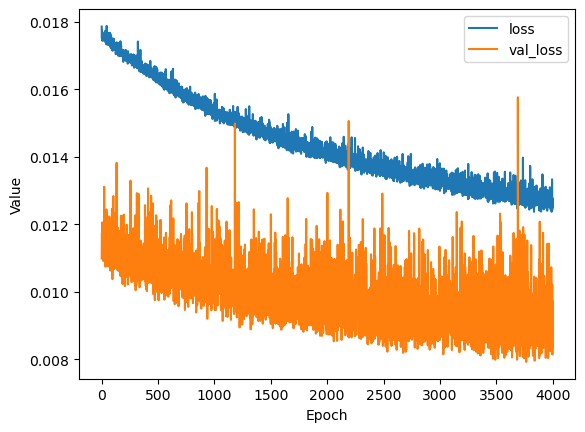

In [243]:
list_of_metrics_to_plot = ['loss','val_loss']
plot_curve(history.epoch, pd.DataFrame(history.history), list_of_metrics_to_plot)

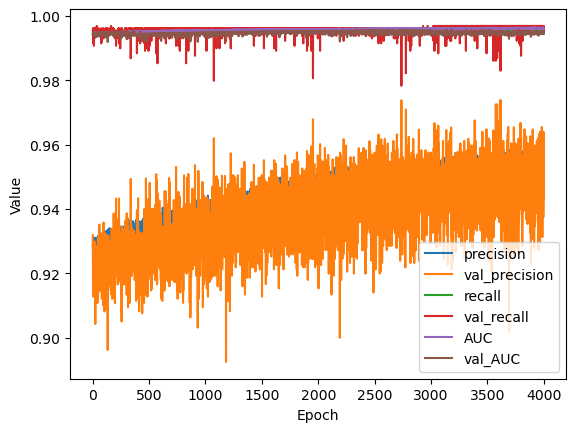

In [244]:
list_of_metrics_to_plot = ['precision','val_precision','recall','val_recall','AUC','val_AUC']
plot_curve(history.epoch, pd.DataFrame(history.history), list_of_metrics_to_plot)

In [211]:
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed.head()

,scaler__amount,scaler__oldbalanceOrig,scaler__newbalanceOrig,scaler__oldbalanceDest,scaler__newbalanceDest,OHE__type_CASH_IN,OHE__type_CASH_OUT,OHE__type_DEBIT,OHE__type_PAYMENT,OHE__type_TRANSFER,passthrough__customerDest,passthrough__merchantDest
3737323,0.250094,-0.281447,-0.172269,-0.190799,-0.300451,1.0,0.0,0.0,0.0,0.0,1.0,0.0
264914,-0.279431,-0.278155,-0.285989,-0.324181,-0.333782,0.0,0.0,0.0,1.0,0.0,0.0,1.0
85647,-0.045699,-0.251754,-0.203827,-0.264833,-0.320406,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5899326,2.280522,-0.288675,-0.292395,0.618756,0.961809,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2544263,-0.168854,0.723236,0.733907,-0.201589,-0.241688,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [245]:
test_scores = NNmodel.evaluate(X_test_transformed, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test root mean squared error:", test_scores[1])

39767/39767 - 51s - loss: 0.0092 - root_mean_squared_error: 0.0408 - recall: 0.9951 - precision: 0.3457 - AUC: 0.9298 - 51s/epoch - 1ms/step
Test loss: 0.00917352270334959
Test root mean squared error: 0.04084905982017517


In [246]:
test_predictions = NNmodel.predict(X_test_transformed)

39767/39767 [==============================] - 51s 1ms/step


Precision:  0.47983268598745143
Recall:  0.991358024691358
Legitimate Transactions Detected (True Negatives):  1269163
Legitimate Transactions Incorrectly Detected (False Positives):  1741
Fraudulent Transactions Missed (False Negatives):  14
Fraudulent Transactions Detected (True Positives):  1606
Total Fraudulent Transactions:  1620


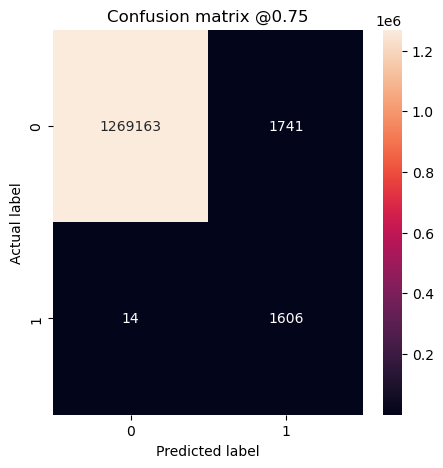

In [256]:
plot_cm(y_test, test_predictions, threshold = 0.75)

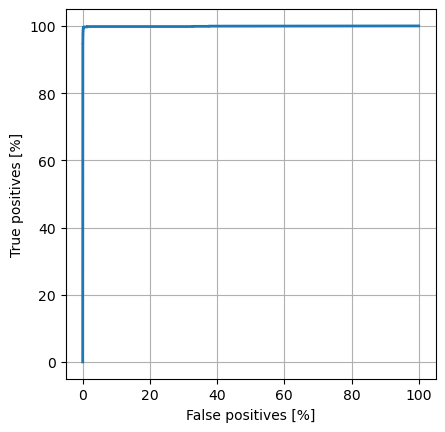

In [253]:
plot_roc("test_plot",y_test, test_predictions)

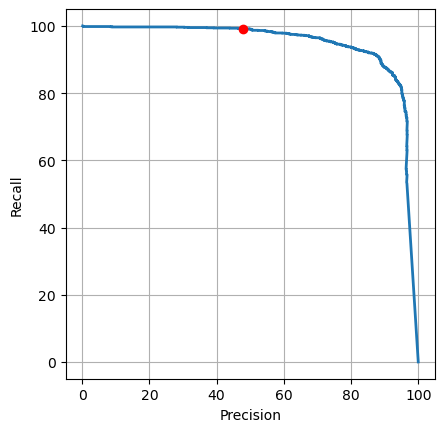

In [255]:
plot_pr("test_plot",y_test, test_predictions, threshold = 0.75)

In this case the model is already performing better, but the recall is too low. As in our case the cost of false negative is much higher than false positive, something should be done in that regard. Options to try would be undersampling negative examples and using weighed loss.

In [257]:
#NNmodel.save('C:/Users/T440s/Documents/GitHub/NNwithFraudTransactions/NNmodel.keras')